The Fourier Theorem
Stated informally, the Fourier theorem tells us that any time series can be represented as a sum of sinusoids.

This is a powerful and useful theorem, as it means that we can use tools such as the Fourier transform and other similar measures, to compute frequency representations of any time series data.

However, just because a signal can be represented by sinusoids does not mean that any given signal, or any given aspect of a signal, for which a power spectrum can be computed should be conceptualized as being comprised of rhythmic components.

The power spectrum is just a possible representation of the original data, not a descriptive claim of the actual components of the data.



In [ ]:
# Import numpy
import numpy as np

# Use NeuroDSP for time series simulations & analyses
from neurodsp import sim
from neurodsp.utils import create_times
from neurodsp.spectral import compute_spectrum_welch
from neurodsp.plts import plot_time_series, plot_power_spectra

In [4]:
# Set random seed, for consistency generating simulated data
sim.set_random_seed(21)

# Simulation Settings
n_seconds = 2
s_rate = 1000

# Compute an array of time values, for plotting, and check length of data
times = create_times(n_seconds, s_rate)
n_points = len(times)
print(n_points)

2000


In [5]:
# Simulate a delta function
dirac_sig = np.zeros([n_points])
dirac_sig[500] = 1

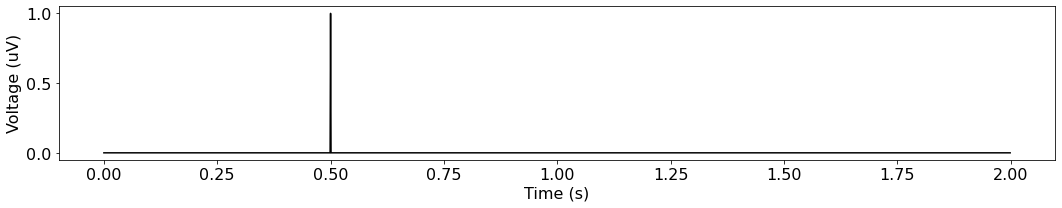

In [6]:
# Plot the time series of the delta signal
plot_time_series(times, dirac_sig)

In [7]:
# Compute a power spectrum of the Dirac delta
freqs, powers = compute_spectrum_welch(dirac_sig, 100)

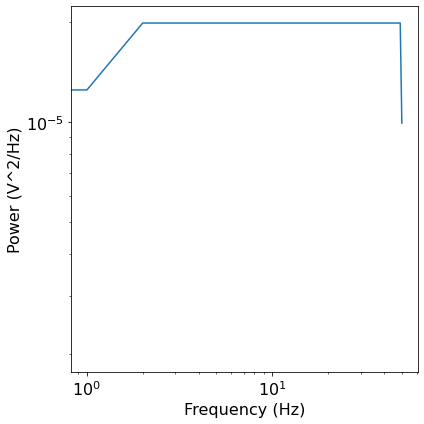

In [8]:
# Plot the power spectrum of the Dirac delta
plot_power_spectra(freqs, powers)

Section Conclusions

As we can see above, the power spectrum of the Dirac delta function has power across all frequencies.

This is despite it containing containing a single non-zero value, and thus having no rhythmic properties to it in the time domain.

The Dirac delta example can be taken as a proof of principle that observing power at a particular frequency does not necessarily imply that one should consider that there are any rhythmic properties at that frequency in the original time series.

In this case, and many like it, power across all frequencies is a representation of transient (or aperiodic) activity in the time series. Broadly, when there are transients, or aperiodic components, lots of sinusoids have to be added together in order to represent aperiodic activity out of a basis set of periodic sine waves, and this is why such signals typically look very broadband in the frequency domain.

White Noise

A ‘white noise’ signal is one that is generated with uncorrelated samples drawn from a random distribution. Since each element of the signal is sampled randomly, there is no consistent rhythmic structure in the signal.

In [9]:
# Generate a white noise time series signal
white_sig = np.random.normal(0, 1, n_points)

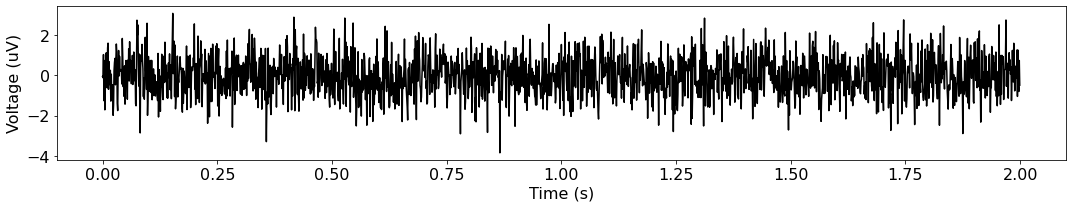

In [10]:
# Plot the white noise time series
plot_time_series(times, white_sig)

In [15]:
# Compute the power spectrum of the white noise signal
freqs, powers = compute_spectrum_welch(white_sig, s_rate)

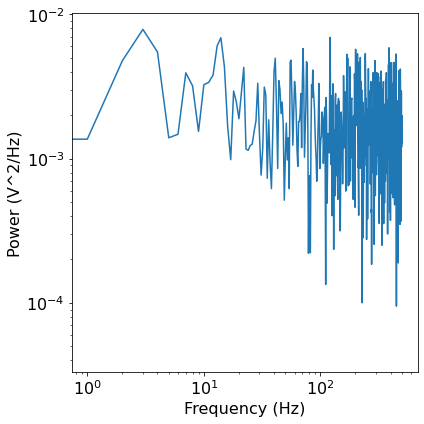

In [16]:
# Visualize the power spectrum of the white noise signal
plot_power_spectra(freqs, powers)

In the frequency representation, we can see that white noise has a flat power spectrum, with equal power across all frequencies. This is the definition of white noise.

This is similar to the delta function, though note that in this case the power across frequencies is representing continuous aperiodic activity, rather than a single transient.

Pink Noise

Other ‘colors’ of noise refer to different patterns of power distributions in the power spectrum.

For example, pink noise is a signal where power systematically decreases across frequencies in the power spectrum.

In [17]:
# Generate a pink noise signal
pink_sig = sim.sim_powerlaw(n_seconds, s_rate, exponent=-1)

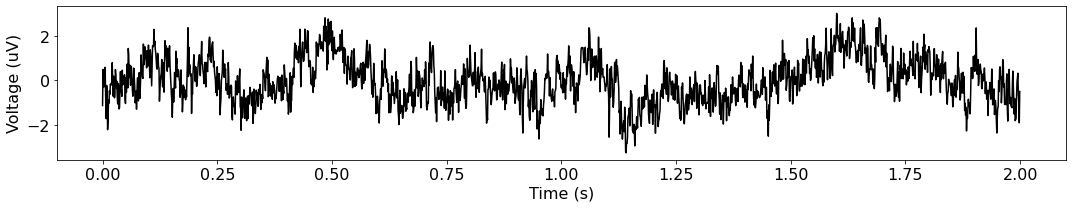

In [18]:
# Plot the pink noise time series
plot_time_series(times, pink_sig)

In [19]:
# Compute the power spectrum of the pink noise signal
freqs, powers = compute_spectrum_welch(pink_sig, s_rate)

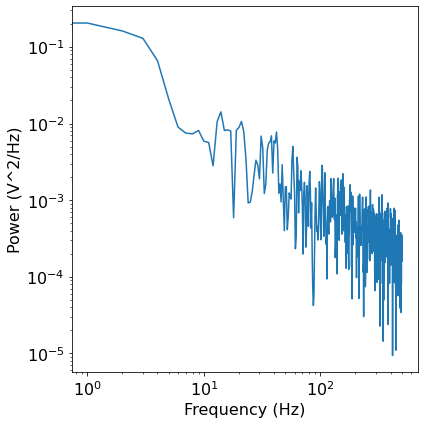

In [20]:
# Visualize the power spectrum of the pink noise signal
plot_power_spectra(freqs, powers)

The ‘colored noise’ signals above are simulated signals with no rhythmic properties, in the sense that there are no characteristic frequencies or visible rhythms in the data.

Nevertheless, and by definition, in the power spectra of such signals, there is power across all frequencies, with some pattern of power across frequencies.

However, there are no frequencies at which power is different from expected from an aperiodic noise signal. These signals are statistically, by definition, aperiodic.

There are many different rhythmic signals we could simulate, in terms of different rhythmic shapes, and or temporal properties (such as rhythmic bursts). For this example, we will stick to simulating continuous sinusoidal signals.

In [21]:
# Generate an oscillating signal
osc_sig = sim.sim_oscillation(n_seconds, s_rate, freq=10)

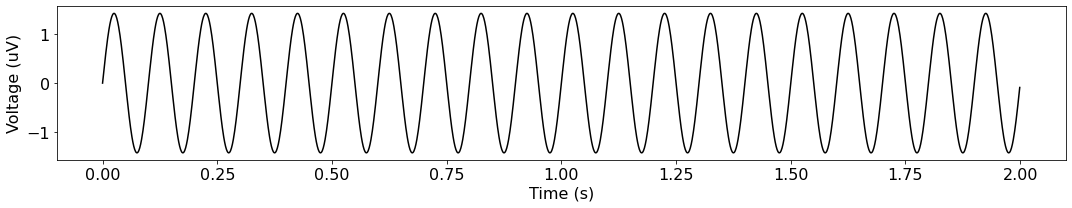

In [22]:
# Plot the oscillating time series
plot_time_series(times, osc_sig)

In [23]:
# Compute the power spectrum of the oscillating signal
freqs, powers = compute_spectrum_welch(osc_sig, s_rate)

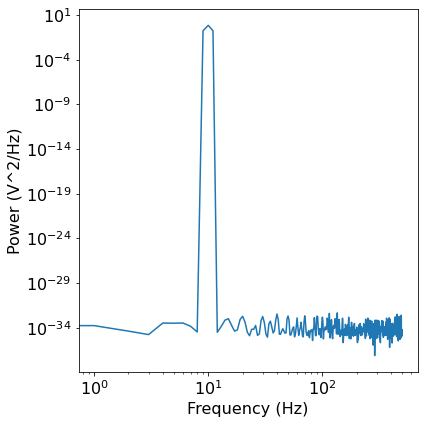

In [24]:
# Visualize the power spectrum of the oscillating signal
plot_power_spectra(freqs, powers)

When there is rhythmic activity at a particular frequency, this exhibits as a ‘peak’ of power in the frequency domain. This peak indicates high power at a specific frequency, where as the power values at all other frequencies are effectively zero.

Combined Aperiodic & Periodic Signals¶
To examine this, we will simulate combined signals, comprising both periodic and aperiodic components, and see what the frequency representations look like.

In [25]:
# Define component of a combined signal: an oscillation and an aperiodic component
components = {
    'sim_oscillation' : {'freq' : 10},
    'sim_powerlaw' : {'exponent' : -1}
}

# Generate a combined signal
combined_sig = sim.sim_combined(n_seconds, s_rate, components)

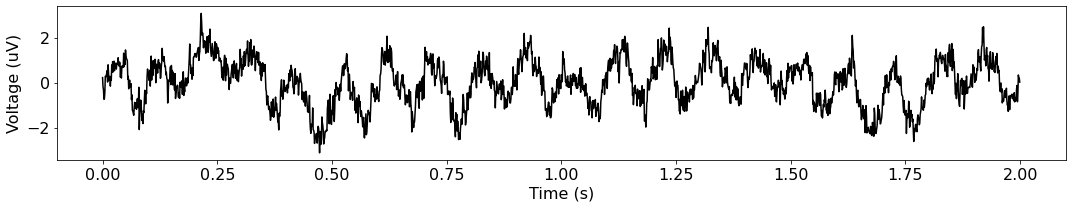

In [26]:
# Plot the combined time series
plot_time_series(times, combined_sig)

In [27]:
# Compute the power spectrum of the combined signal
freqs, powers = compute_spectrum_welch(combined_sig, s_rate)

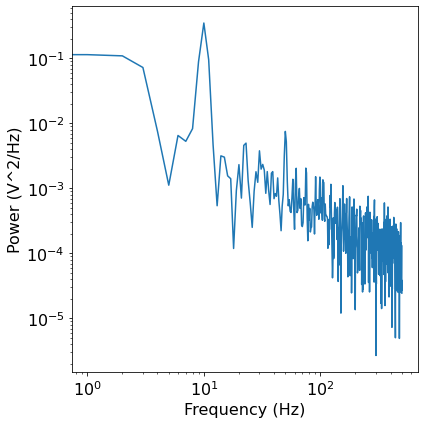

In [28]:
# Visualize the power spectrum of the combined signal
plot_power_spectra(freqs, powers)

In the power spectrum above, we can see that combined signals, with aperiodic & periodic activity reflect elements of both components. The periodic power can be seen as a peak of power over and above the rest of the spectrum, at the frequency of the simulated rhythm. Across all frequencies, we also see the power contributed by the aperiodic component.

In this example, we have seen that, in the frequency domain:

transients and aperiodic activity exhibit power across all frequencies
oscillations exhibit specific power, or a ‘peak’, at the frequency of the rhythm
combined signals display a combination of these properties, with power across all frequencies, and overlying ‘peaks’ at frequencies with periodic activity
Collectively, we have seen cases that motivate that simply having power at a particularly frequency does not imply any rhythmic component at that frequency. Peaks of frequency specific power are associated with rhythmic activity in the time series.

What we have covered here are just a starting point for some properties of time series analysis and digital signal processing. For neural data, these properties alone do not tell us how to interpret neural power spectra. However, here we take them as a starting point that motivate why prominent rhythms in the time series can be measured as peaks in the power spectrum, but that absent a peak, we should not automatically interpret power at any given frequency as necessarily reflecting rhythmic activity.

Filtering Signals
A common component of many analyses of neural time series is to apply filters, typically to try to extract information from frequency bands of interest.

However, one thing to keep in mind is that signals with aperiodic activity will always contain power at all frequencies. One of the corollaries of thinking of neural signals as containing aperiodic activity, is that there is always power within any arbitrarily defined frequency range. This power does not necessarily entail any periodic activity, but it can look like periodic activity when applying transforms such as narrow-band filters.

In [30]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Import the Bands object, for managing frequency band definitions
from fooof.bands import Bands

# Imports from NeuroDSP to simulate & plot time series
from neurodsp.sim import sim_powerlaw, set_random_seed
from neurodsp.filt import filter_signal
from neurodsp.plts import plot_time_series
from neurodsp.utils import create_times

<ipython-input-30-83e2e9f21b8f>:6: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof.bands import Bands


In [31]:
# Define our bands of interest
bands = Bands({'delta' : [2, 4],
               'theta' : [4, 8],
               'alpha' : [8, 13],
               'beta' : [13, 30],
               'low_gamma' : [30, 50],
               'high_gamma' : [50, 150]})

In [32]:
# Simulation settings
s_rate = 1000
n_seconds = 4
times = create_times(n_seconds, s_rate)

# Set random seed, for consistency generating simulated data
set_random_seed(21)

In [33]:
# Simulate a signal of aperiodic activity: pink noise
sig = sim_powerlaw(n_seconds, s_rate, exponent=-1)

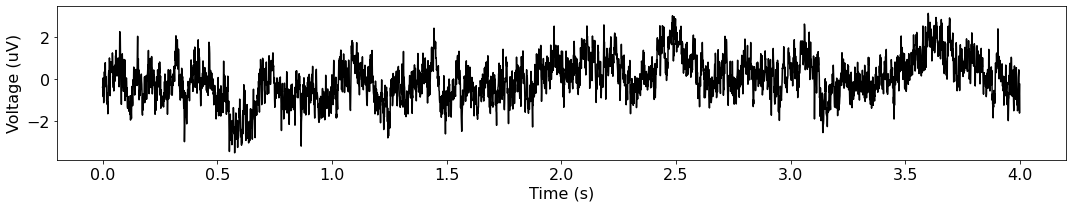

In [34]:
# Plot our simulated time series
plot_time_series(times, sig)

Filtering Aperiodic Signals
Now that we have a simulated signal, let’s filter it into each of our frequency bands.

To do so, we will loop across our band definitions, and plot the filtered version of the signal.

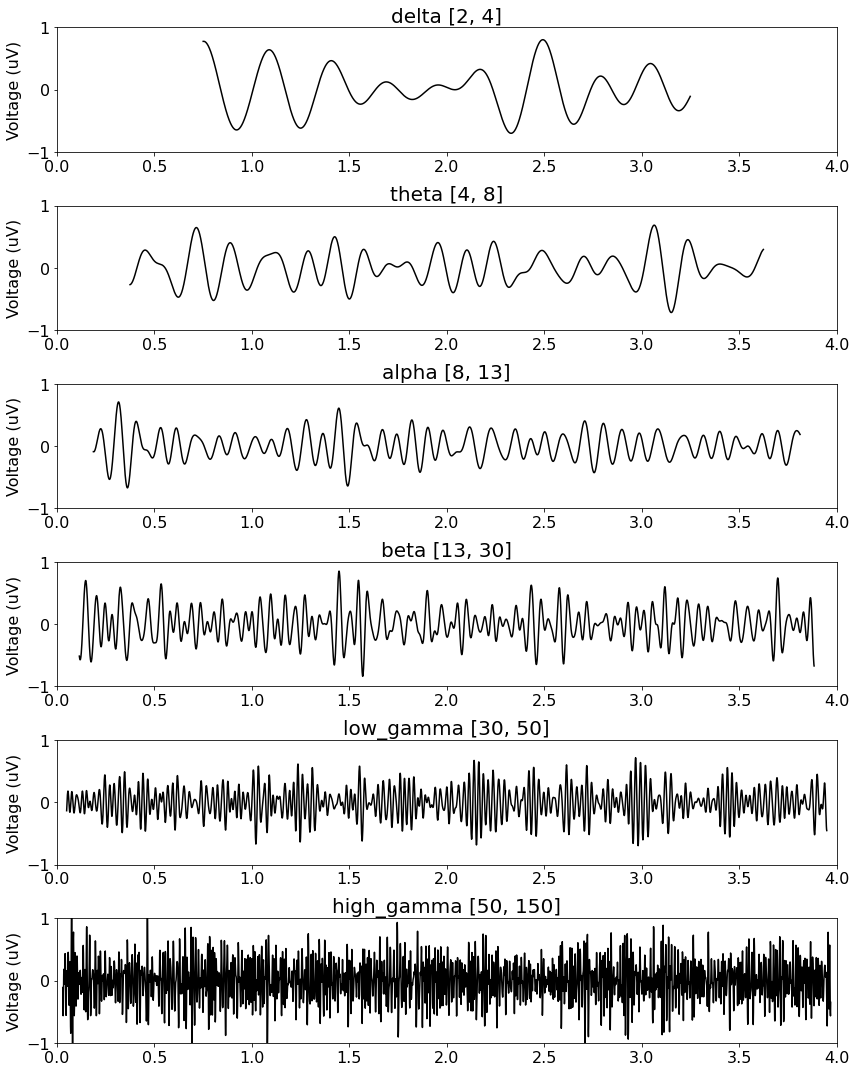

In [35]:
# Apply band-by-band filtering of our signal into each defined frequency band
_, axes = plt.subplots(len(bands), 1, figsize=(12, 15))
for ax, (label, f_range) in zip(axes, bands):

    # Filter the signal to the current band definition
    band_sig = filter_signal(sig, s_rate, 'bandpass', f_range)

    # Plot the time series of the current band, and adjust plot aesthetics
    plot_time_series(times, band_sig, title=label + ' ' + str(f_range), ax=ax,
                     xlim=(0, n_seconds), ylim=(-1, 1), xlabel='')

As we can see, filtering a signal with aperiodic activity into arbitrary frequency ranges returns filtered signals that look like rhythmic activity.

Also, because our simulated signal has some random variation, the filtered components also exhibit some fluctuations.

Overall, we can see from filtering this signal that:

narrow band filters return rhythmic looking outputs
filtering a signal with aperiodic activity will always return non-zero outputs
there can be dynamics in the filtered results, due to variations of the aperiodic properties of the input signal
In this case, recall that our simulated signal contains no periodic activity. Altogether, this can be taken as example that just because time series can be represented as and decomposed into sinusoids, this does not indicate that these signals, or resulting decompositions, reflect rhythmic activity.

Observing Changes in Filtered Signals¶
Next, let’s consider what it looks like if you filter a signal that contains changes in the aperiodic activity.

For this example, we will simulate a signal, with an abrupt change in the aperiodic activity.

We will then filter this signal into narrow-band frequency ranges, to observe how changes in aperiodic activity appear in filtered data.

In [36]:
# Simulate a two signals with different aperiodic activity
sig_comp1 = sim_powerlaw(n_seconds/2, s_rate, exponent=-1.5, f_range=(None, 150))
sig_comp2 = sim_powerlaw(n_seconds/2, s_rate, exponent=-1, f_range=(None, 150))

# Combine each component signal to create a signal with a shift in aperiodic activity
sig_delta_ap = np.hstack([sig_comp1, sig_comp2])

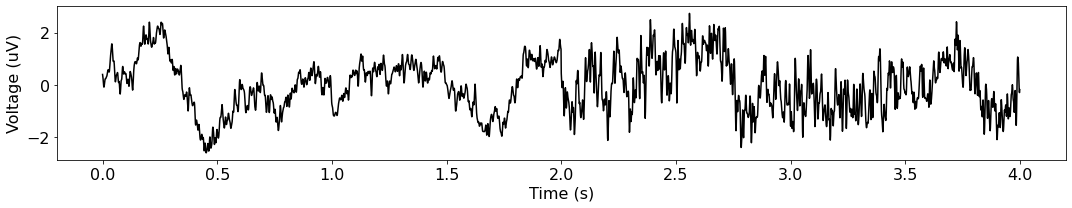

In [37]:
# Plot our time series, with a shift in aperiodic activity
plot_time_series(times, sig_delta_ap)

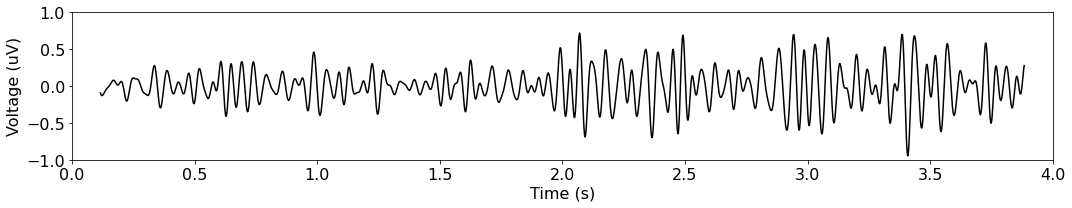

In [38]:
# Filter the signal to the current band definition
band_sig = filter_signal(sig_delta_ap, s_rate, 'bandpass', bands.beta)

# Plot the filtered time series
plot_time_series(times, band_sig, xlim=(0, n_seconds), ylim=(-1, 1))

In the above, we can see that this shift in the aperiodic component of the data exhibits as what looks to be change in beta band activity.

We can also examine what this kind of shift looks like in high frequency regions that are sometimes analyzed, like our ‘high-gamma’ frequency band

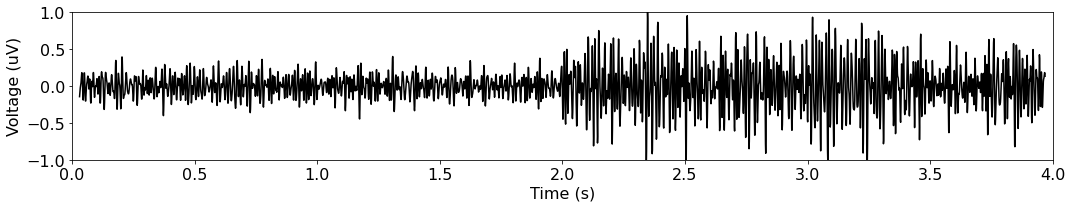

In [39]:
# Filter the signal to the current band definition
band_sig = filter_signal(sig_delta_ap, s_rate, 'bandpass', bands.high_gamma)

# Plot the filtered time series
plot_time_series(times, band_sig, xlim=(0, n_seconds), ylim=(-1, 1))

Collectively, we can see that changes in aperiodic properties, that affect all frequencies, can look like band-specific changes when time series are analyzed using narrow-band filters.

If individual bands are filtered and analyzed in isolation, without comparison to either aperiodic measures, or other frequency bands, this kind of analysis could mis-interpret broadband aperiodic changes as oscillatory changes.

Note that in real data, to what extent such aperiodic shifts occur is something of an open question. Within subject changes in aperiodic activity has been observed, and so this remains a possibility that should be considered.

Conclusions
Here we have seen that filtering signals to narrow band signals can return results that reflect periodic activity and dynamics. We therefore suggest that narrow band filtered signals should not be presumed to necessarily reflect periodic activity. In order to ascertain whether narrow band frequency regions reflect periodic and/or aperiodic activity and which aspects are changing in the data, additional analyses, such as parameterizing neural power spectra, are recommended.

‘Oscillations’ as Peaks
Exploring the idea of oscillations as peaks of power.

In [40]:
# Imports from NeuroDSP to simulate & plot time series
from neurodsp.sim import sim_powerlaw, sim_oscillation, sim_combined, set_random_seed
from neurodsp.spectral import compute_spectrum
from neurodsp.plts import plot_time_series, plot_power_spectra
from neurodsp.utils import create_times

In [41]:
# Define simulation settings
n_seconds = 30
fs = 1000

# Create a times vector
times = create_times(n_seconds, fs)

Frequency Specific Power
Part of the motivation behind spectral parameterization is dissociating aperiodic activity, with no characteristic frequency, to periodic power, which is defined as having frequency specific power. This leads to the idea of oscillations as ‘peaks’ of power in the power spectrum, which can be detected and measured.

In this exploration, we will use simulated time series to examine how rhythmic signals do display as ‘peaks’ of power in frequency domain representations. We will also explore some limitations of this idea.

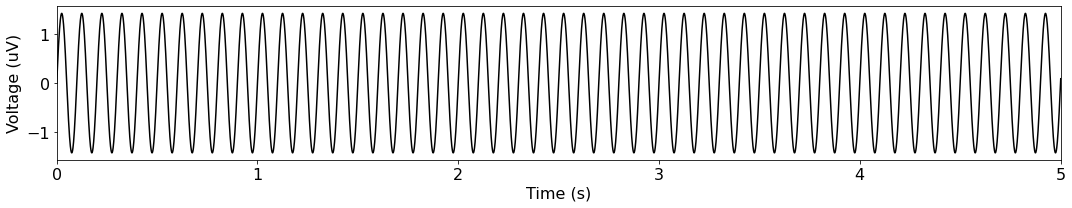

In [42]:
# Simulate an ongoing sine wave
sine_wave = sim_oscillation(n_seconds, fs, 10)

# Visualize the sine wave
plot_time_series(times, sine_wave, xlim=[0, 5])

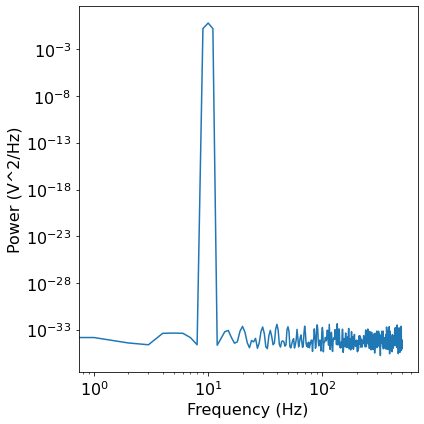

In [43]:
# Compute the power spectrum of the sine wave
freqs, powers = compute_spectrum(sine_wave, fs)

# Visualize the power spectrum
plot_power_spectra(freqs, powers)

The power spectrum of the sine wave shows a clear peak of power at 10 Hz, reflecting the simulated rhythm, with close to zero power at all other frequencies.

This is characteristic of a sine wave, and demonstrates the basic idea of considering oscillations as peaks of power in the power spectrum.

Next lets examine a more complicated signal, with multiple components.

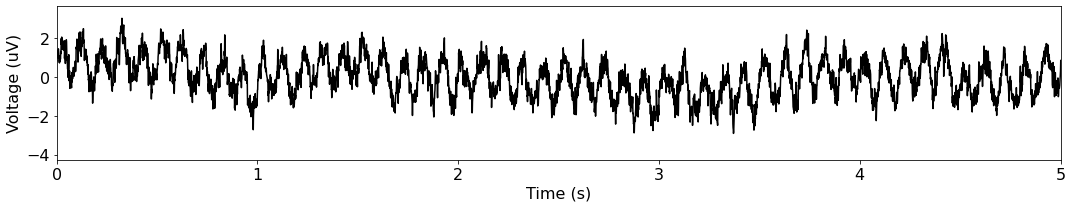

In [44]:
# Define components for a combined signal
components = {
    'sim_oscillation' : {'freq' : 10},
    'sim_powerlaw' : {'exponent' : -1},
}

# Simulate a combined signal
sig = sim_combined(n_seconds, fs, components)

# Visualize the time series
plot_time_series(times, sig, xlim=[0, 5])

Here we see a simply simulation meant to be closer to neural data, reflecting an oscillatory component, as well as an aperiodic component, which contributes power across all frequencies.

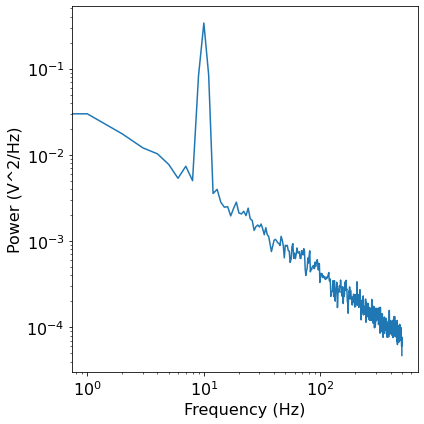

In [45]:
# Compute the power spectrum of the sine wave
freqs, powers = compute_spectrum(sig, fs)

# Visualize the power spectrum
plot_power_spectra(freqs, powers)

Interim Conclusion
In the power spectrum of the combined signal, we can still the peak of power at 10 Hz, as well as the pattern of power across all frequencies contributed by the aperiodic component.

This basic example serves as the basic motivation for spectral parameterization. In this simulated example, we know there are two components, and so a procedure for detecting the peaks and measuring the pattern of aperiodic power (as is done in spectral parameterization) provides a method to measuring these components in the data.

Harmonic Peaks
The above seeks to demonstrate the basic idea whereby a peak of power _may_ reflect an oscillation at that frequency, where as patterns of power across all frequencies likely reflect aperiodic activity.

In the this section, we will further explore peaks of power in the frequency domain, showing that not every peak necessarily reflect an independent oscillation.

To do so, we will start by simulating a non-sinusoidal oscillation.

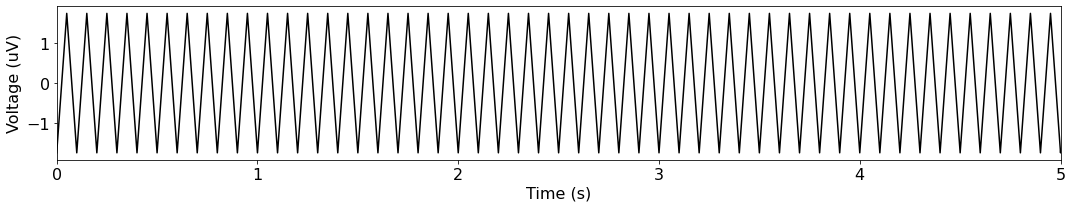

In [46]:
# Simulate a sawtooth wave
sawtooth = sim_oscillation(n_seconds, fs, 10, 'sawtooth', width=0.5)

# Visualize the sine wave
plot_time_series(times, sawtooth, xlim=[0, 5])

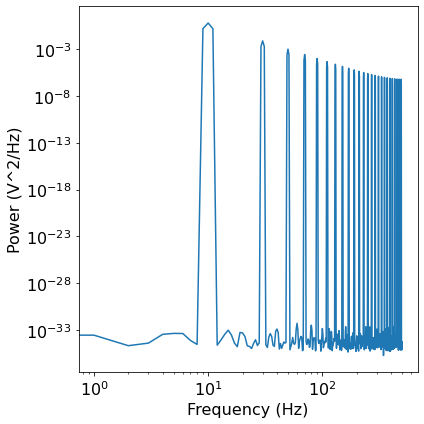

In [47]:
# Compute the power spectrum of the sine wave
freqs, powers = compute_spectrum(sawtooth, fs)

# Visualize the power spectrum
plot_power_spectra(freqs, powers)

Note the 10 Hz peak, as well as the additional peaks in the frequency domain.

Before further discussing this, let’s create an example with an aperiodic component.

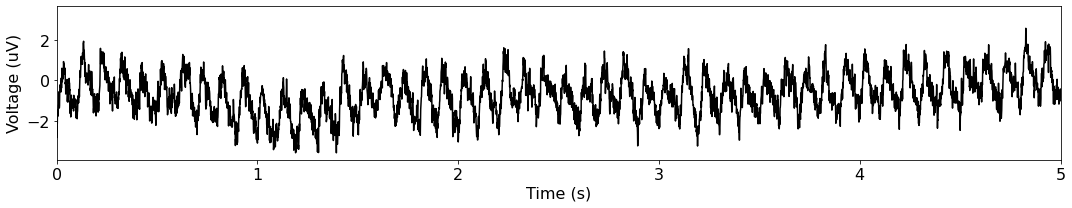

In [48]:
# Define components for a combined signal
components = {
    'sim_oscillation' : {'freq' : 10, 'cycle' : 'sawtooth', 'width' : 0.25},
    'sim_powerlaw' : {'exponent' : -1.},
}

# Simulate a combined signal
sig = sim_combined(n_seconds, fs, components)

# Visualize the time series
plot_time_series(times, sig, xlim=[0, 5])

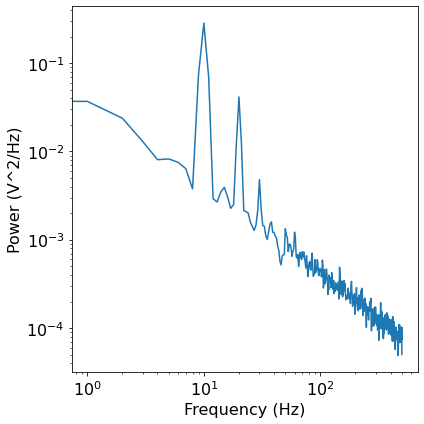

In [49]:
# Compute the power spectrum of the sine wave
freqs, powers = compute_spectrum(sig, fs)

# Visualize the power spectrum
plot_power_spectra(freqs, powers)

In the power spectrum above, we see that there is a peak of power at the fundamental frequency of the rhythm (10 Hz), but there are also numerous other peaks. These additional peaks are ‘harmonics’, and that are components of the frequency domain representation that reflect the non-sinusoidality of the time domain signal.

This serves as the basic motivation for the claim that although a peak _may_ reflect an independent oscillation, this need not be the case, as a given peak could simply be the harmonic of an asymmetric oscillation at a different frequency. For this reason, the number of peaks in a model can not be interpreted as the number of oscillations in a signal.

Band-by-Band
Comparing how ‘Band-by-Band’ approaches relate to periodic & aperiodic components.

This example is based on a recent project investigating band-by-band analyses as often done in the context of development. The paper for that project is available here. 
https://www.biorxiv.org/content/10.1101/839258v1


In [50]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Import the FOOOF object
from fooof import FOOOF

# Import simulation, utility, and plotting tools
from fooof.bands import Bands
from fooof.utils import trim_spectrum
from fooof.analysis import get_band_peak_fm
from fooof.sim.gen import gen_power_spectrum
from fooof.sim.utils import set_random_seed
from fooof.plts.spectra import plot_spectra_shading

Overview
A common analysis approach for investigating neural data is to measure and analyze changes across multiple frequency bands.

This is typically done using predefined bands, such as:

delta (1-4 Hz)
theta (4-8 Hz)
alpha (8-13 Hz)
beta (13-30 Hz)
gamma (30-50 Hz)
When analyzed in this way, and comparing within or between subjects, investigations often report a pattern of changes or differences across bands, for example:

decreased power in lower frequency bands (delta, theta)
increased power in higher frequency bands (beta, gamma)
Under this framework, each defined band reflects a different entity in the data, and the interpretation is typically that there are multiple things changing, with correlated changes in power across multiple distinct bands.

An alternative hypothesis for what is changing is that this pattern of results could be driven by changes or differences in the aperiodic component of the data. Changes in aperiodic activity, when analyzed in a band-by-band manner, can look like correlated changes across multiple bands.

In this example, we will use simulated data to examine both the different ways of analyzing such data (band-by-band compared to parameterizing neural power spectra), and examine what it looks like if data differs in these hypothesized ways. To do so, we will simulate and analyze data with correlated changes in multiple distinct frequency bands, as well as data in which there is a shift in the aperiodic component.

Settings
First, we can define some settings for this notebook and analysis.

In [51]:
# Define our frequency bands of interest
bands = Bands({'delta' : [1, 4],
               'theta' : [4, 8],
               'alpha' : [8, 13],
               'beta' : [13, 30],
               'gamma' : [30, 50]})

# Define plot settings
t_settings = {'fontsize' : 24, 'fontweight' : 'bold'}
shade_cols = ['#e8dc35', '#46b870', '#1882d9', '#a218d9', '#e60026']
labels = ['Group-1', 'Group-2']

# General simulation settings
f_range = [1, 50]
nlv = 0

# Define some template strings for reporting
exp_template = "The difference of aperiodic exponent is: \t {:1.2f}"
pw_template = ("The difference of {:5} power is  {: 1.2f}\t"
               "with peaks or  {: 1.2f}\t with bands.")

Helper Functions
Throughout this notebook we will be computing and analyzing differences between power spectra. Here, we will define some helper functions to do so.

In [52]:
def compare_exp(fm1, fm2):
    """Compare exponent values."""

    exp1 = fm1.get_params('aperiodic_params', 'exponent')
    exp2 = fm2.get_params('aperiodic_params', 'exponent')

    return exp1 - exp2

def compare_peak_pw(fm1, fm2, band_def):
    """Compare the power of detected peaks."""

    pw1 = get_band_peak_fm(fm1, band_def)[1]
    pw2 = get_band_peak_fm(fm2, band_def)[1]

    return pw1 - pw2

def compare_band_pw(fm1, fm2, band_def):
    """Compare the power of frequency band ranges."""

    pw1 = np.mean(trim_spectrum(fm1.freqs, fm1.power_spectrum, band_def)[1])
    pw2 = np.mean(trim_spectrum(fm1.freqs, fm2.power_spectrum, band_def)[1])

    return pw1 - pw2

Band-by-Band
In the ‘band-by-band’ idea of the data, analyses and interpretations focus on analyzing activity across a range of frequency bands, and looking for patterns of changes within and between these bands.

To visualize this, we can simulate hypothesized power spectra for different groups, in which we will set the same aperiodic activity, and vary overlying periodic peaks.

In this example, for clarity, the center frequencies for all peaks are simulated as being the same between groups, though in real data these could also vary.

In [53]:
# Set consistent aperiodic parameters
ap_params = [1, 1]

# Set periodic parameters, defined to vary between groups
#   All parameters are set to match, except for systematic power differences
pe_g1 = [[2, 0.25, 1], [6, 0.2, 1], [10, 0.5, 1.5], [20, 0.2, 3], [40, 0.25, 3.5]]
pe_g2 = [[2, 0.5, 1], [6, 0.3, 1], [10, 0.5, 1.5], [20, 0.15, 3], [40, 0.15, 3.5]]

# Set random seed, for consistency generating simulated data
set_random_seed(21)

In [54]:
# Simulate example power spectra for each group
freqs, g1_spectrum_bands = gen_power_spectrum(f_range, ap_params, pe_g1, nlv)
freqs, g2_spectrum_bands = gen_power_spectrum(f_range, ap_params, pe_g2, nlv)

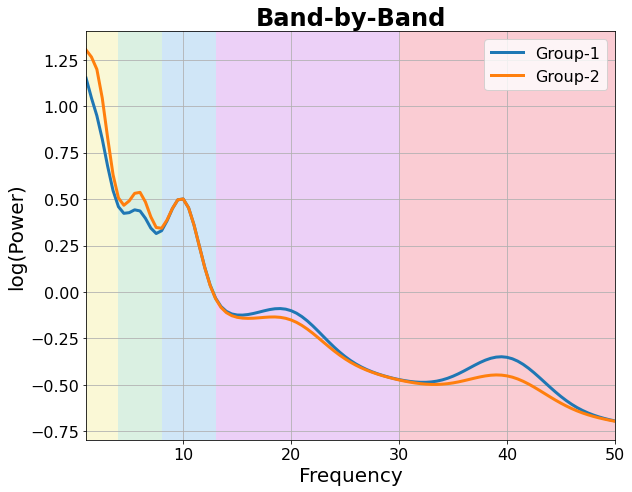

In [55]:
# Plot the power spectra differences, representing the 'band-by-band' idea
plot_spectra_shading(freqs, [g1_spectrum_bands, g2_spectrum_bands],
                     log_powers=True, linewidth=3,
                     shades=bands.definitions, shade_colors=shade_cols,
                     labels=labels)
plt.xlim(f_range);
plt.title('Band-by-Band', t_settings);

Flatten the Spectra¶
Under the band-by-band idea, controlling for aperiodic activity and flattening the spectra should show specific differences in each band.

It should also find no systematic difference in the aperiodic activity between groups.

To check this, we can fit power spectrum models, and examine which parameters are changing in the data.

In [56]:
# Initialize FOOOF objects
fm_bands_g1 = FOOOF(verbose=False)
fm_bands_g2 = FOOOF(verbose=False)

# Fit power spectrum models
fm_bands_g1.fit(freqs, g1_spectrum_bands)
fm_bands_g2.fit(freqs, g2_spectrum_bands)

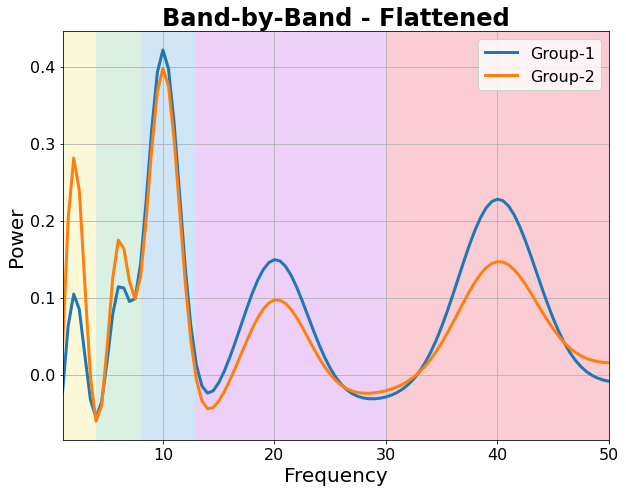

In [57]:
# Plot the power spectra differences
plot_spectra_shading(freqs, [fm_bands_g1._spectrum_flat, fm_bands_g2._spectrum_flat],
                     log_powers=False, linewidth=3,
                     shades=bands.definitions, shade_colors=shade_cols,
                     labels=labels)
plt.xlim(f_range);
plt.title('Band-by-Band - Flattened', t_settings);

Compare Spectral Parameters
Next, let’s compare the measured parameters of the data.

In [58]:
# Check the difference of aperiodic activity between age groups
print(exp_template.format(compare_exp(fm_bands_g1, fm_bands_g2)))

The difference of aperiodic exponent is: 	 -0.07


In [59]:
# Check the difference in periodic activity, across bands, between groups
for label, definition in bands:
    print(pw_template.format(label,
                             compare_peak_pw(fm_bands_g1, fm_bands_g2, definition),
                             compare_band_pw(fm_bands_g1, fm_bands_g2, definition)))

The difference of delta power is  -0.18	with peaks or  -0.16	 with bands.
The difference of theta power is  -0.05	with peaks or  -0.06	 with bands.
The difference of alpha power is   0.02	with peaks or  -0.00	 with bands.
The difference of beta  power is   0.05	with peaks or   0.02	 with bands.
The difference of gamma power is   0.08	with peaks or   0.04	 with bands.


In the measurements above, we can see there is a negligible difference in the aperiodic properties of the data, but that there are differences within individual bands, with the same pattern of results highlighted by comparing either the parameterized peaks or the average band power.

This is as expected, given that we simulated the data to reflect this idea. In the simulation we can see that both a band-by-band analysis, and parameterizing neural power spectra give the same, and correct result for this case.

Periodic & Aperiodic
An alternative hypothesis is that aperiodic activity may vary between groups.

In the next simulation, we will simulate each group as having same periodic activity, in this case, just an alpha peak, with a difference in the aperiodic activity.

In [60]:
# Simulate spectra for each group, with aperiodic differences
freqs, g1_spectrum_pa = gen_power_spectrum(f_range, [1.0, 1.25], [10, 0.5, 1.5], nlv)
freqs, g2_spectrum_pa = gen_power_spectrum(f_range, [0.7, 1.00], [10, 0.5, 1.5], nlv)

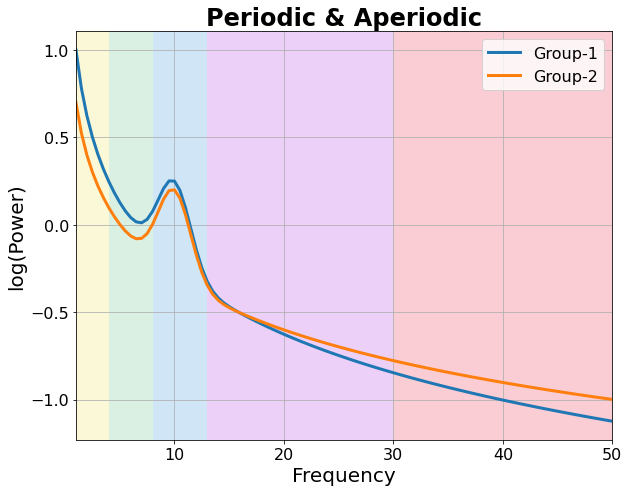

In [61]:
# Plot the power spectra differences
plot_spectra_shading(freqs, [g1_spectrum_pa, g2_spectrum_pa],
                     log_freqs=False, log_powers=True, linewidth=3,
                     shades=bands.definitions, shade_colors=shade_cols,
                     labels=labels)
plt.xlim(f_range);
plt.title('Periodic & Aperiodic', t_settings);

Flatten the Spectra
In the scenario in which there are differences in aperiodic activity, flattening the spectra should show no differences in periodic peaks.

We can again parameterize the spectra to investigate this.

In [62]:
# Initialize FOOOF objects
fm_pa_g1 = FOOOF(verbose=False)
fm_pa_g2 = FOOOF(verbose=False)

# Fit power spectrum models
fm_pa_g1.fit(freqs, g1_spectrum_pa)
fm_pa_g2.fit(freqs, g2_spectrum_pa)

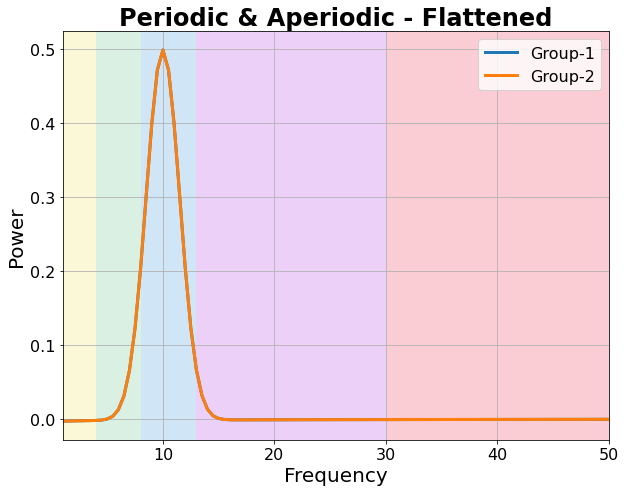

In [63]:
# Plot the power spectra differences
plot_spectra_shading(freqs, [fm_pa_g1._spectrum_flat, fm_pa_g2._spectrum_flat],
                     log_powers=False, linewidth=3,
                     shades=bands.definitions, shade_colors=shade_cols,
                     labels=labels)
plt.xlim(f_range);
plt.title('Periodic & Aperiodic - Flattened', t_settings);

Compare Spectral Parameters
Let’s again compare the measured parameters of the data.

In [64]:
# Check the difference of aperiodic activity between age groups
print(exp_template.format(compare_exp(fm_pa_g1, fm_pa_g2)))

The difference of aperiodic exponent is: 	 0.25


In [65]:
# Check the difference in periodic activity, across bands, between groups
for label, definition in bands:
    print(pw_template.format(label,
                             compare_peak_pw(fm_pa_g1, fm_pa_g2, definition),
                             compare_band_pw(fm_pa_g1, fm_pa_g2, definition)))

The difference of delta power is   nan	with peaks or   0.21	 with bands.
The difference of theta power is   nan	with peaks or   0.11	 with bands.
The difference of alpha power is   0.00	with peaks or   0.05	 with bands.
The difference of beta  power is   nan	with peaks or  -0.03	 with bands.
The difference of gamma power is   nan	with peaks or  -0.10	 with bands.


In the measurements above, we can now see that we are measuring a difference in the aperiodic properties of the data.

We also see a different results when looking at bands / peaks, depending on how we analyze them. The band-by-band analysis reports a pattern of differences across the frequency bands. However, the parameterized analysis reports no differences in identified peaks.

Note that when comparing peaks, ‘nan’ reflects that there were no identified peaks to compare, where are a zero value reflects that peaks were detected, but they did not differ.

In this case, we know that the parameterization approach results in the correct interpretation of the changes in the data.

Conclusion
Here we have investigated changes across power spectra, comparing a ‘band-by-band’ approach to the parameterizing neural power spectra notion of ‘periodic & aperiodic’ components.

What we can see is that parameterizing neural power spectra is able to determine if changes are driven by differences in oscillatory peaks, and/or by changes in the aperiodic component of the data.

However, we also saw that simply doing a band-by-band power analysis can conflate differences from aperiodic and periodic changes. Specifically, when we change the aperiodic activity in a power spectrum, the band-by-band analysis suggests that multiple distinct frequency bands are changing, whereas the more parsimonious (and in the simulated case, the true) conclusion should be that changes are driven by changes in the aperiodic activity that affects all frequencies. This also means that if a band-by-band analysis finds differences across bands, this is not enough to know if there are band-specific changes, or aperiodic changes, as this analysis approach does not differentiate the two.

We conclude here that band-by-band analysis, without measuring or controlling for aperiodic activity, are ill posed to adjudicate which aspects of the data are changing. Parameterizing neural power spectra allows for disentangling changes in periodic and aperiodic components of the data.

In this example, with simulated data, we cannot conclude which changes are more likely to be occurring in real data. However, in the real data analysis that this example is based on, it was found that a great deal of the changes across development are driven by aperiodic changes, and not by band-by-band differences. This finding came from using the parameterization approach, but was not evidence in prior work using only a band-by-band approach

Band Ratio Measures
Exploring how band ratio measures relate to periodic & aperiodic activity.

Introduction
Band ratios measures are a relatively common measure, proposed to measure oscillatory, or periodic, activity.

They are typically calculated as:

BR = avg(lowbandpower)/avg(highbandpower)

 
In this notebook we will explore this measure in the context of conceptualizing neural power spectra as a combination of aperiodic and periodic activity.

https://github.com/voytekresearch/BandRatios


In [66]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Import simulation, utility, and plotting tools
from fooof.bands import Bands
from fooof.utils import trim_spectrum
from fooof.sim.gen import gen_power_spectrum
from fooof.sim.utils import set_random_seed
from fooof.plts.spectra import plot_spectra_shading

In [67]:
# General Settings

# Define band definitions
bands = Bands({'theta' : [4, 8], 'beta' : [20, 30]})

# Define helper variables for indexing peak data
icf, ipw, ibw = 0, 1, 2

# Plot settings
shade_color = '#0365C0'

Simulating Data
For this example, we will use simulated data. Let’s start by simulating a a baseline power spectrum.

In [68]:
# Simulation Settings
nlv = 0
f_res = 0.1
f_range = [1, 35]

# Define default aperiodic values
ap = [0, 1]

# Define default periodic values for band specific peaks
theta = [6, 0.4, 1]
alpha = [10, 0.5, 0.75]
beta  = [25, 0.3, 1.5]

# Set random seed, for consistency generating simulated data
set_random_seed(21)

In [69]:
# Simulate a power spectrum
freqs, powers = gen_power_spectrum(f_range, ap, [theta, alpha, beta], nlv, f_res)

Calculating Band Ratios
Band ratio measures are a ratio of power between defined frequency bands.

We can now define a function we can use to calculate band ratio measures, and apply it to our baseline power spectrum.

For this example, we will be using the theta / beta ratio, which is the most commonly applied band ratio measure.

Note that it doesn’t matter exactly which ratio measure or which frequency band definitions we use, as the general properties demonstrated here generalize to different bands and ranges.

In [70]:
def calc_band_ratio(freqs, powers, low_band, high_band):
    """Helper function to calculate band ratio measures."""

    # Extract frequencies within each specified band
    _, low_band = trim_spectrum(freqs, powers, low_band)
    _, high_band = trim_spectrum(freqs, powers, high_band)

    # Calculate average power within each band, and then the ratio between them
    ratio = np.mean(low_band) / np.mean(high_band)

    return ratio

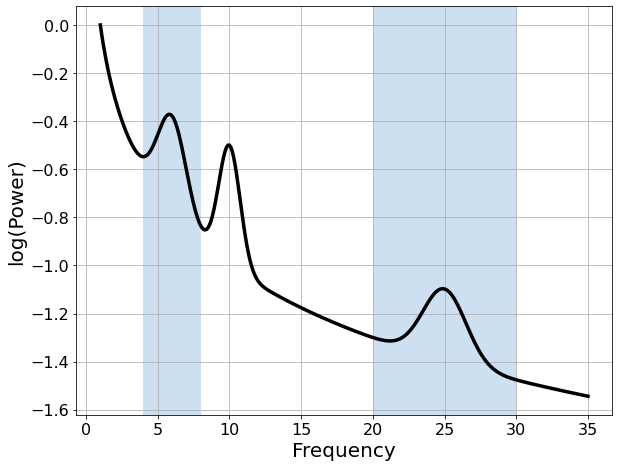

In [71]:
# Plot the power spectrum, shading the frequency bands used for the ratio
plot_spectra_shading(freqs, powers, [bands.theta, bands.beta],
                     color='black', shade_colors=shade_color,
                     log_powers=True, linewidth=3.5)

In [72]:
# Calculate a band ratio measure
tbr = calc_band_ratio(freqs, powers, bands.theta, bands.beta)
print('Calculate theta / beta ratio is :\t {:1.2f}'.format(tbr))

Calculate theta / beta ratio is :	 5.74


Periodic Impacts on Band Ratio Measures
Typical investigations involving band ratios compare differences in band ratio measures within and between subjects. The typical interpretation of band ratio measures is that they relate to the relative power between two bands.

Next, lets simulate data that varies across different periodic parameters of the data, and see how this changes our measured theta / beta ratio, as compared to our baseline power spectrum.

In [73]:
# Define a helper function for updating parameters
from copy import deepcopy
def upd(data, index, value):
    """Return a updated copy of an array."""
    out = deepcopy(data)
    out[index] = value
    return out

In [74]:
# Simulate and collect power spectra with changes in each periodic parameter
spectra = {
    'Theta Frequency' : None,
    'Theta Power' : gen_power_spectrum(\
        f_range, ap, [upd(theta, ipw, 0.5041), alpha, beta], nlv, f_res)[1],
    'Theta Bandwidth' : gen_power_spectrum(\
        f_range, ap, [upd(theta, ibw, 1.61), alpha, beta], nlv, f_res)[1],
    'Alpha Frequency' : gen_power_spectrum(\
        f_range, ap, [theta, upd(alpha, icf, 8.212), beta], nlv, f_res)[1],
    'Alpha Power' : None,
    'Alpha Bandwidth' : gen_power_spectrum(\
        f_range, ap, [theta, upd(alpha, ibw, 1.8845), beta], nlv, f_res)[1],
    'Beta Frequency' : gen_power_spectrum(\
        f_range, ap, [theta, alpha, upd(beta, icf, 19.388)], nlv, f_res)[1],
    'Beta Power' : gen_power_spectrum(\
        f_range, ap, [theta, alpha, upd(beta, ipw, 0.1403)], nlv, f_res)[1],
    'Beta Bandwidth' : gen_power_spectrum(\
        f_range, ap, [theta, alpha, upd(beta, ibw, 0.609)], nlv, f_res)[1],
}

In [75]:
# Calculate changes in theta / beta ratios
for label, spectrum in spectra.items():
    if spectrum is not None:
        print('TBR difference from   {:20}   is \t {:1.3f}'.format(\
            label, tbr - calc_band_ratio(freqs, spectrum, bands.theta, bands.beta)))

TBR difference from   Theta Power            is 	 -1.000
TBR difference from   Theta Bandwidth        is 	 -1.000
TBR difference from   Alpha Frequency        is 	 -1.000
TBR difference from   Alpha Bandwidth        is 	 -1.000
TBR difference from   Beta Frequency         is 	 -1.000
TBR difference from   Beta Power             is 	 -1.000
TBR difference from   Beta Bandwidth         is 	 -1.000


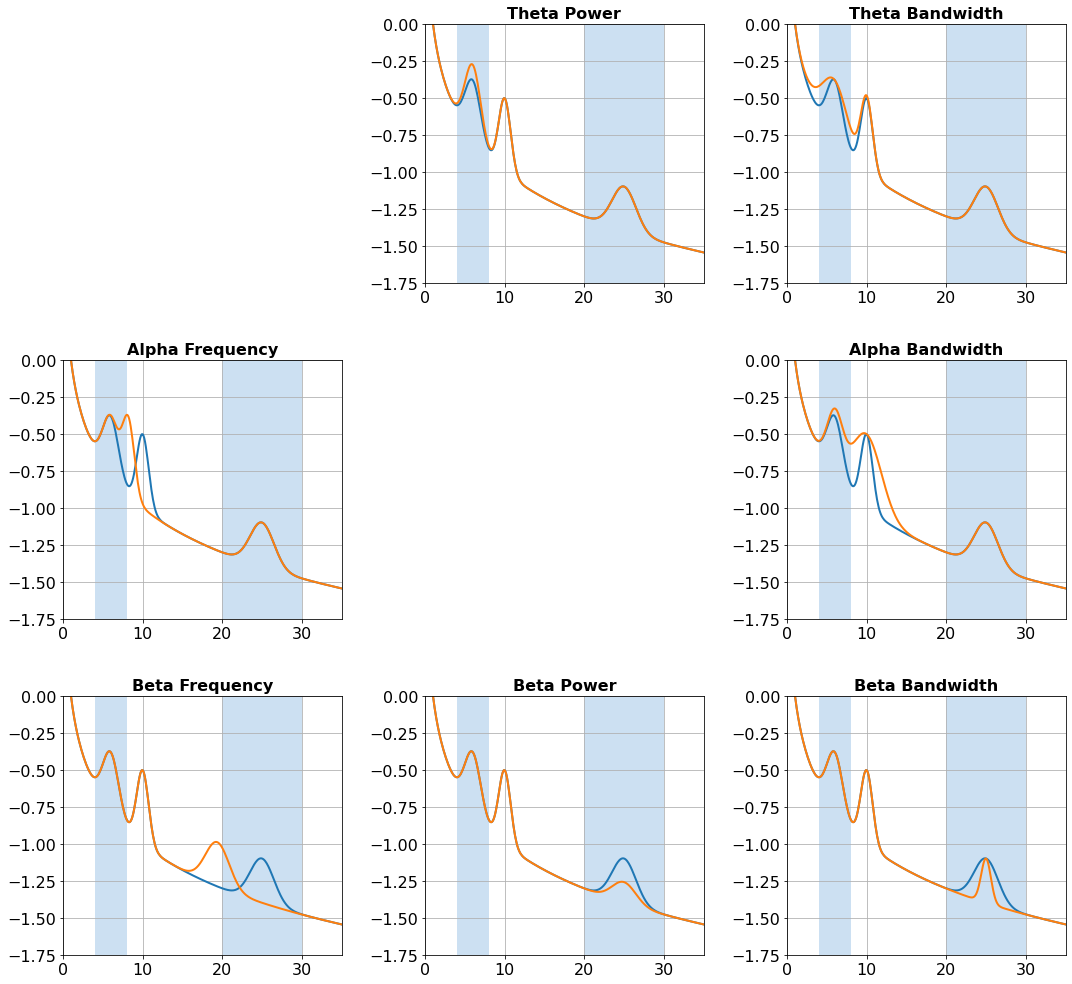

In [76]:
# Create figure of periodic changes
title_settings = {'fontsize': 16, 'fontweight': 'bold'}
fig, axes = plt.subplots(3, 3, figsize=(15, 14))

for ax, (label, spectrum) in zip(axes.flatten(), spectra.items()):

    if spectrum is None: continue

    plot_spectra_shading(freqs, [powers, spectrum],
                         [bands.theta, bands.beta], shade_colors=shade_color,
                         log_freqs=False, log_powers=True, ax=ax)

    ax.set_title(label, **title_settings)
    ax.set_xlim([0, 35]); ax.set_ylim([-1.75, 0])
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)

# Turn off empty axes & space out axes
fig.subplots_adjust(hspace=.3, wspace=.3)
_ = [ax.axis('off') for ax in [axes[0, 0], axes[1, 1]]]

In the simulations above, we systematically manipulated each parameter of each of the three different band peaks present in our data. For 7 of the 9 possible changes, we can do so in a way that creates an identical change in the measured band ratio measure.

Band ratio measures are therefore not specific to band power differences, but rather can reflect multiple different changes across multiple different periodic parameters.

Aperiodic Impacts on Band Ratio Measures
Next, we can also examine if changes in aperiodic properties of the data can also impact band ratio measures. We will explore changes in the aperiodic exponent, with and without overlying peaks.

To do so, we will use the same approach to simulating, comparing, and plotting data as above (though note that the code to do so has been condensed in the next section).

In [77]:
# Simulate and collect power spectra with changes in aperiodic parameters
exp_spectra = {
    'Exponent w Peaks' : \
        [powers,
         gen_power_spectrum(f_range, [0.13, 1.1099],
                            [theta, alpha, beta], nlv, f_res)[1]],
    'Exponent w/out Peaks' : \
        [gen_power_spectrum(f_range, ap, [], nlv, f_res)[1],
         gen_power_spectrum(f_range, [0.13, 1.1417], [], nlv, f_res)[1]]}

	TBR difference from   Exponent w Peaks       is 	 -1.000
	TBR difference from   Exponent w/out Peaks   is 	 -1.000


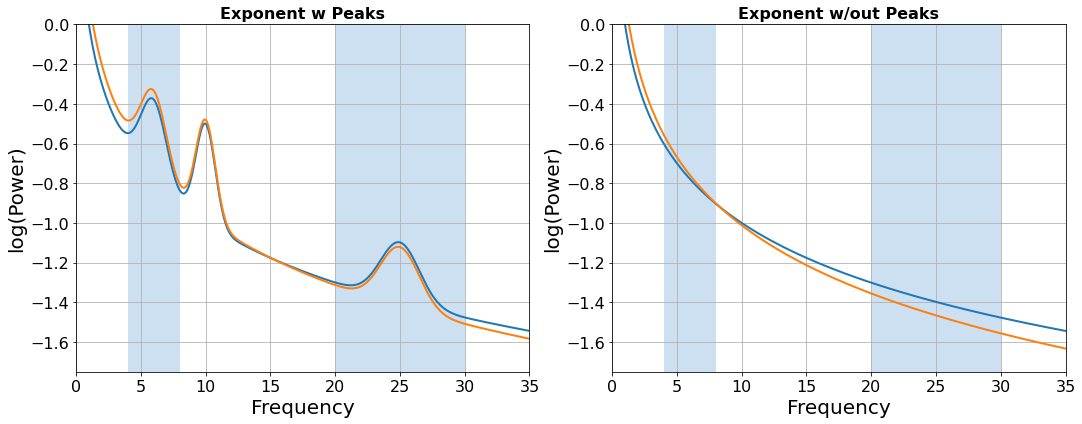

In [78]:
# Calculate & plot changes in theta / beta ratios
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.subplots_adjust(wspace=.3)
for ax, (label, (comparison, spectrum)) in zip(axes, exp_spectra.items()):
    print('\tTBR difference from   {:20}   is \t {:1.3f}'.format(label, \
        calc_band_ratio(freqs, comparison, bands.theta, bands.beta) - \
        calc_band_ratio(freqs, spectrum, bands.theta, bands.beta)))
    plot_spectra_shading(freqs, [comparison, spectrum],
                         [bands.theta, bands.beta],
                         shade_colors=shade_color,
                         log_freqs=False, log_powers=True, ax=ax)
    ax.set_title(label, **title_settings)
    ax.set_xlim([0, 35]); ax.set_ylim([-1.75, 0])

In these simulations, we again see that we can obtain the same measured difference in band ratio measures from differences in the aperiodic properties of the data. This is true even if there are no periodic peaks present at all.

This shows that band ratio measures are not even specific to periodic activity, and can be driven by changes in aperiodic activity.

Band ratio measures are supposed to reflect the relative power of rhythmic neural activity.

However, here we can see that band ratio measures are actually under-determined in that many different changes of both periodic and aperiodic parameters can affect band ratio measurements - including aperiodic changes when there is no periodic activity.

For this reason, we conclude that band-ratio measures, by themselves, are an insufficient measure of neural activity. We propose that approaches such as parameterizing power spectra are more specific for adjudicating what is changing in neural data.

For more investigation into band ratios, their methodological issues, applications to real data, and a comparison to parameterizing power spectra, https://github.com/voytekresearch/BandRatios


Conflating Periodic & Aperiodic Changes
Demonstrating how changes in periodic & aperiodic parameters can be conflated.

This example is a code implementation and quantitatively exact version of Figure 1 from the Parameterizing Neural Power Spectra paper. https://www.biorxiv.org/content/10.1101/2020.01.11.900977v1


Measuring Neural Activity
In electrophysiological data analysis, we often wish to measure and interpret changes in particular aspects of our data, for example, measuring changes in the power of a frequency band of interest.

In this example, we will examine how using predefined frequency ranges to measure and then interpret differences from power spectra can lead to misinterpretations in the face of complex data in which multiple different aspects of the data can change or vary within and between recordings.

We conceptualize neural data as complex data that contains multiple ‘components’, which we categorize as periodic and aperiodic, and note that each of these components can also have multiple parameters, each of which could vary.

To briefly recap, these components and parameters include:

aperiodic activity, the 1/f-like aspect of the data, described, at minimum with:
exponent
offset
periodic activity, peaks in the power spectrum, each with a:
center frequency
power
bandwidth

In [79]:
# Import numpy & matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Import simulation, utility, and plotting tools
from fooof.bands import Bands
from fooof.utils import trim_spectrum
from fooof.sim.gen import gen_power_spectrum
from fooof.plts.spectra import plot_spectra_shading

In [80]:
# Settings for plotting
log_freqs = True
log_powers = True
shade_color = '#0365C0'

Simulating Data
For this example, we will use simulated data, and consider the example case of investigating differences in alpha activity.

We will start by simulating a baseline power spectrum, with an alpha peak, and concurrent aperiodic activity. We will also simulate several altered versions of this spectrum, each which a change in a specific parameter of the power spectrum.

In [81]:
# Define our bands of interest
bands = Bands({'alpha' : (8, 12)})

# Simulation Settings
nlv = 0
f_res = 0.1
f_range = [3, 35]

# Define baseline parameter values
ap_base = [0, 1.5]
pe_base = [[10, 0.5, 1], [22, 0.2, 2]]

# Define parameters sets with changes in each parameter
pw_diff = [[10, 0.311, 1], [22, 0.2, 2]]
cf_diff = [[11.75, 0.5, 1], [22, 0.2, 2]]
off_diff = [-0.126, 1.5]
exp_diff = [-0.87, 0.75]

In [82]:
# Create baseline power spectrum, to compare to
freqs, powers_base = gen_power_spectrum(f_range, ap_base, pe_base, nlv, f_res)

In [83]:
# Create comparison power spectra, with differences in different parameters of the data
_, powers_pw = gen_power_spectrum(f_range, ap_base, pw_diff, nlv, f_res)
_, powers_cf = gen_power_spectrum(f_range, ap_base, cf_diff, nlv, f_res)
_, powers_off = gen_power_spectrum(f_range, off_diff, pe_base, nlv, f_res)
_, powers_exp = gen_power_spectrum(f_range, exp_diff, pe_base, nlv, f_res)

In [84]:
# Collect the comparison power spectra together
all_powers = {
    'Alpha Power Change' : powers_pw,
    'Alpha Frequency Change' : powers_cf,
    'Offset Change' : powers_off,
    'Exponent Change' : powers_exp
}

Plotting Power Spectra
Now that we have our power spectra simulated, let’s plot them all together.

In the visualization below, we can see that we have created four sets of comparisons, where each has a change in one parameter of the data.

Specifically, these changes are:

a change in alpha power, part of the periodic component
a change in alpha center frequency, part of the periodic component
a change in the offset of the aperiodic component
a change in the exponent of the aperiodic component

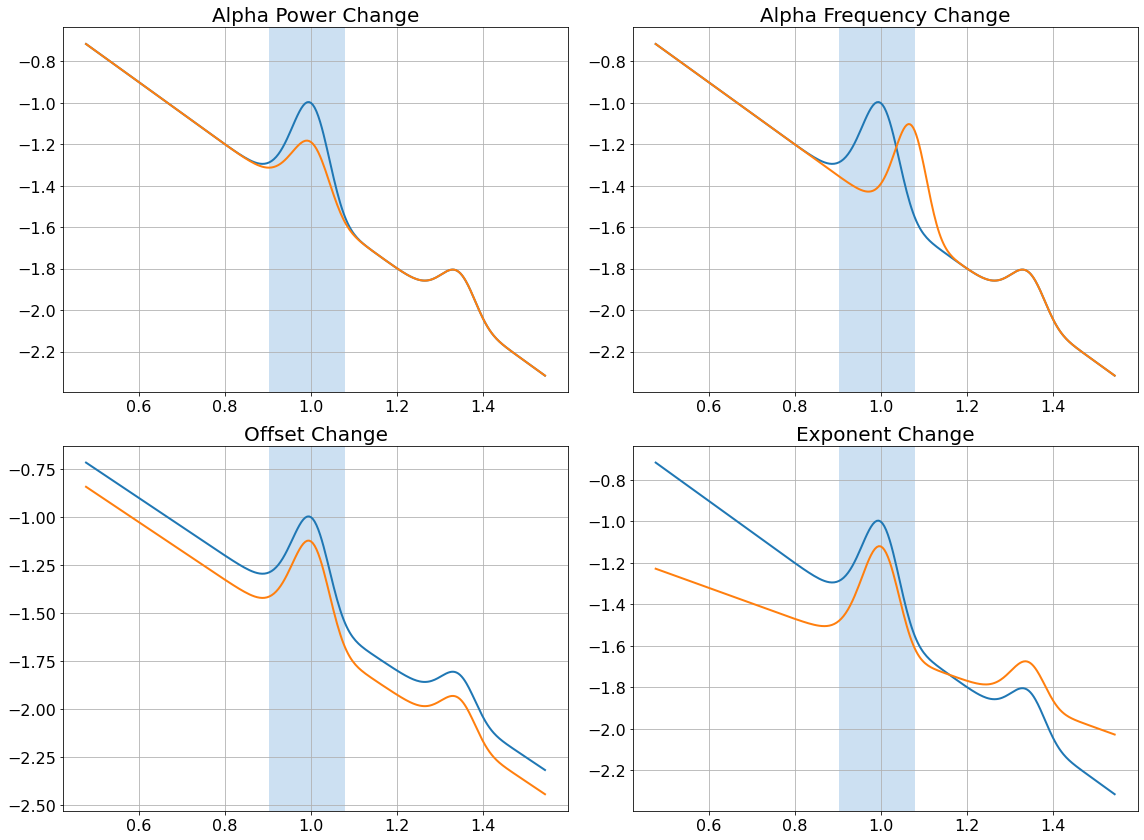

In [85]:
# Plot and compare all of our power spectra
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
for ax, (title, powers) in zip(axes.reshape(-1), all_powers.items()):

    # Create spectrum plot, with alpha band of interest shaded in
    plot_spectra_shading(freqs, [powers_base, powers],
                         bands.alpha, shade_colors=shade_color,
                         log_freqs=log_freqs, log_powers=log_powers, ax=ax)

    # Add the title, and do some plot styling
    ax.set_title(title, {'fontsize' : 20})
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)

Comparing Power Spectra
Now let’s compare our different power spectra, in terms of band-specific power measures.

To do so, we will first define a helper function that calculates the average power in a band.

Then, for each pair, consisting of the baseline power spectrum and an adapted version in which one parameter has been changed, we can measure the change in band specific activity relating to this change.

In [86]:
def calc_avg_power(freqs, powers, freq_range):
    """Helper function to calculate average power in a band."""

    _, band_powers = trim_spectrum(freqs, powers, freq_range)
    avg_power = np.mean(band_powers)

    return avg_power

In [87]:
# Calculate the amount of alpha power in the baseline power spectrum
base_alpha = calc_avg_power(freqs, powers_base, bands.alpha)

In [88]:
# Calculate the different in alpha power for each of our comparison pairs
for title, powers in all_powers.items():
    print('{:20s}\t {:1.4f}'.format(\
        title, calc_avg_power(freqs, powers, bands.alpha) - base_alpha))

Alpha Power Change  	 -0.0171
Alpha Frequency Change	 -0.0171
Offset Change       	 -0.0171
Exponent Change     	 -0.0171


We can see that all of these cases have the exact measured change in alpha power!

However, given that we know exactly what was changed in the simulated data, we know that a change in alpha power is only the correct interpretation in one of the cases that we simulated.

For all the other comparisons, the change in the data is not a change in band specific power. Despite this, the common analysis approach measures it as such.

This shows how measurements that are supposed to reflect band specific power changes can easily be conflated and misinterpreted, as they can be driven by other changes in the data.

Spectra Without any Oscillations¶
So far we have considered the case in which the goal is to analyze and measure alpha power activity, in a scenario in which there actually is alpha activity.

However, we can also consider the possible scenario of analyzing alpha power (or, by analogy, any other band), in cases in which there is no band-specific power.

To do so, we will simulate, plot and measure a new set of data, with the same set up as above, but without adding any alpha peaks to the spectra.

In [89]:
# Redefine baseline with no alpha
pe_base_na = [[22, 0.2, 2]]

# Redefine changes in for each parameter
off_diff_na = [-0.321, 1.5]
exp_diff_na = [-1.31, 0.5]

In [90]:
# Create baseline power spectrum, to compare to
freqs, powers_noa_base = gen_power_spectrum(f_range, ap_base, pe_base_na, nlv, f_res)

# Collect all powers together,
all_powers_na = {'Offset Change' : \
                    gen_power_spectrum(f_range, off_diff_na, pe_base_na, nlv, f_res)[1],
                 'Exponent Change' : \
                    gen_power_spectrum(f_range, exp_diff_na, pe_base_na, nlv, f_res)[1]}

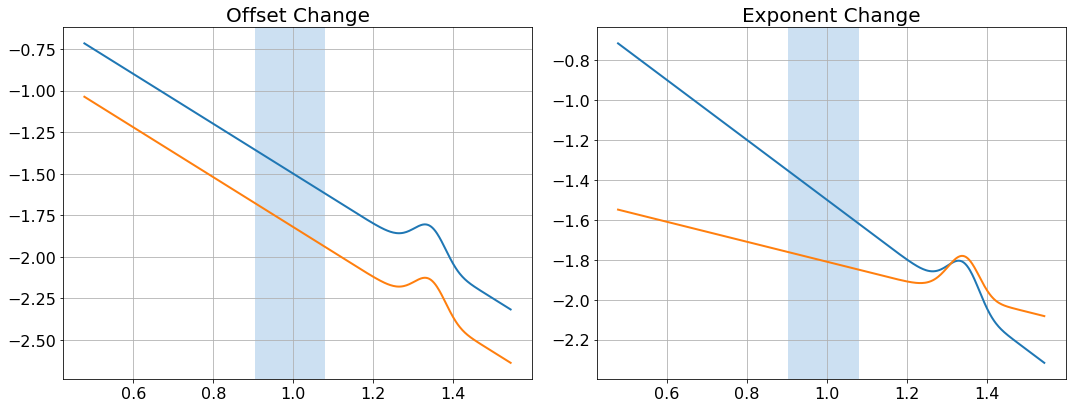

In [91]:
# Plot and compare spectra with no alpha
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
for ax, (title, powers) in zip(axes.reshape(-1), all_powers_na.items()):

    # Create spectrum plot, with alpha band of interest shaded in
    plot_spectra_shading(freqs, [powers_noa_base, powers],
                         bands.alpha, shade_colors=shade_color,
                         log_freqs=log_freqs, log_powers=log_powers, ax=ax)

    # Add the title, and do some plot styling
    ax.set_title(title, {'fontsize' : 20})
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)

In [92]:
# Calculate and compare the difference of 'alpha' power
base_noa_power = calc_avg_power(freqs, powers_noa_base, [8, 12])
for title, powers in all_powers_na.items():
    print('{:20s}\t {:1.4f}'.format(\
        title, calc_avg_power(freqs, powers, [8, 12]) - base_noa_power))

Offset Change       	 -0.0171
Exponent Change     	 -0.0171


In the plots and analyses above, we can see that when analyzing a predefined narrow-band frequency range, we can get the same measured difference in ‘alpha’ power between spectra, even if there is no evidence of an oscillation at all.

Conclusion
In the simulations above, we have shown that changes in multiple different parameters can lead to the same measured difference in band-specific power.

In any given case in which narrow-band ranges are used, any of these changes, or a combination of them, could be contributing to the measured changes.

As an alternative to analyzing narrow-band power, parameterizing power spectra offers an approach that can measure which parameters of the data are changing, and in what ways.

# 01: Model Description
A description of and introduction to the power spectrum model.

Introduction
Welcome to the tutorials!

In this first tutorial, we will introduce an overview and description of power spectrum model, as well as visualizing some examples.

Keep in mind as you go, that if you want more information that describes, motivates, and justifies our modeling approach, you can also check out the associated paper, and/or the motivations section of the site.

Example Power Spectra and Models
First, we will import and run some code to simulate some example power spectra, and fit some power spectrum models to them, to use as examples.

For the purpose of this tutorial, you don’t need to know how this code works yet, and can skip past reading the code itself.

In [93]:
# Import required code for visualizing example models
from fooof import FOOOF
from fooof.sim.gen import gen_power_spectrum
from fooof.sim.utils import set_random_seed
from fooof.plts.spectra import plot_spectra
from fooof.plts.annotate import plot_annotated_model

In [94]:
# Set random seed, for consistency generating simulated data
set_random_seed(21)

# Simulate example power spectra
freqs1, powers1 = gen_power_spectrum([3, 40], [1, 1],
                                     [[10, 0.2, 1.25], [30, 0.15, 2]])
freqs2, powers2 = gen_power_spectrum([1, 150], [1, 125, 1.25],
                                     [[8, 0.15, 1.], [30, 0.1, 2]])

In [95]:
# Initialize power spectrum model objects and fit the power spectra
fm1 = FOOOF(min_peak_height=0.05, verbose=False)
fm2 = FOOOF(min_peak_height=0.05, aperiodic_mode='knee', verbose=False)
fm1.fit(freqs1, powers1)
fm2.fit(freqs2, powers2)

# Now, we have some data and models to work with.

To start with, we can plot one of our simulated power spectra.

Plotted below is an example power spectrum, plotted in semi-log space (log10 power values and linear frequencies). This is our data, that we will be trying to model.

In the plot, we see a power spectrum in which there is decreasing power across increasing frequencies. In some frequency regions, there is a ‘peak’ of power, over and above the general trend across frequencies. These properties - a pattern of decreasing power across frequencies, with overlying peaks - are considered to be hallmarks of neural field data.

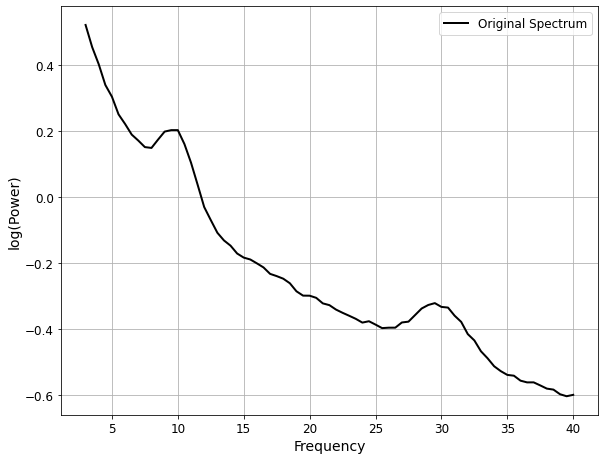

In [96]:
# Plot one of the example power spectra
plot_spectra(freqs1, powers1, log_powers=True,
             color='black', label='Original Spectrum')

# Conceptual Overview
The goal of this module is to fit models to parameterize neural power spectra.

One reason to do so is the idea that there are multiple distinct ‘components’ within neural field data. The model is therefore designed to measure these different ‘components’ of the data.

By components, we mean that we are going to conceptualize neural field data as consisting of a combination of periodic (oscillatory) and aperiodic activity. Restated, we could say that neural data contains both periodic and aperiodic components.

The goal of the model is to measure these components, separately and explicitly, from frequency representations of neural field data (neural power spectra).

# Visualizing Power Spectrum Models
First, let’s start by revisiting the example power spectrum, this time also adding the model fit to the plot.

In the plot below, black is the data, same as before, and in red we’ve added the model fit of the data. If things are working, this line should be good approximation of the data.

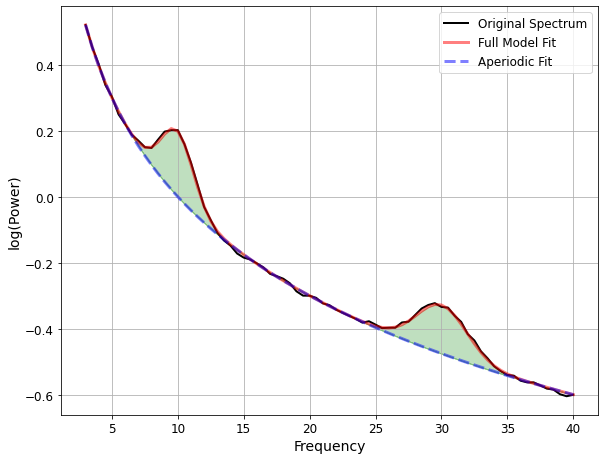

In [97]:
# Plot an example power spectrum, with a model fit
fm1.plot(plot_peaks='shade', peak_kwargs={'color' : 'green'})

Given the full model, in red, we can then describe this spectrum in terms of the ‘components’ that make up the model fit, which are:

aperiodic: activity with no characteristic frequency (or ‘non-frequency specific’ activity)
in power spectra, this looks like a trend across all frequencies
in the plot above, this is what is captured by the dashed blue line
periodic : activity with a characteristic frequency
in power spectra, this looks like a ‘peak’, or ‘bump’, reflecting frequency specific power
in the plot above, this is what is captured by the green shaded peaks
Each of these components also has different ‘features’ or ‘properties’, that we want to describe and measure. Since these ‘features’ are things that we will be fitting in the model, we will call them parameters (as in, the ‘model parameters’).

The full model of the power spectrum is the combination of the two components: the aperiodic component and the periodic component (the set of peaks).

The goal of the model is to measure these two components, to create the full model fit, in a way that accurately and quantitatively describes the data.

# Mathematical Description of Overall Model
To enact the conceptual idea described above, we will need to formalize the model. To do so, throughout the rest of this tutorial, we will lay out the mathematical description of how neural power spectra can be modeled as a combination of periodic and aperiodic activity.

Overall, the goal is to describe a neural power spectrum, described as , as a combination of periodic and aperiodic components. We will describe each of these components in their own section.

Note that as we go, we will continue to consider power in log10 spacing. You will also see each component includes , where  is the array of frequency values (in linear spacing) for the power spectrum, which just indicates that each component is a function of frequency.

# Periodic Component
By periodic activity, we mean activity that has a characteristic frequency. This includes what are typically referred to as neural oscillations, often described in particular frequency bands such as delta, theta, alpha, beta, gamma, etc.

In the frequency domain, putative oscillations are frequency regions in which there are ‘bumps’ of power over and above the aperiodic component. We will generally refer to the these as ‘peaks’ in the neural power spectrum.

To measure the periodic activity, we would like to describe these peaks, without our measures of these peaks being influenced by co-occurring aperiodic activity. This is important, since, as we can see in the plots above, the aperiodic and periodic components of the data can ‘overlap’, in frequency space. This means the total power at a given frequency may have contributions from both components. To measure periodic power, specifically, we need to measure the power relative to the aperiodic component of the data.

Next, let’s explore an annotated version of our power spectrum model.

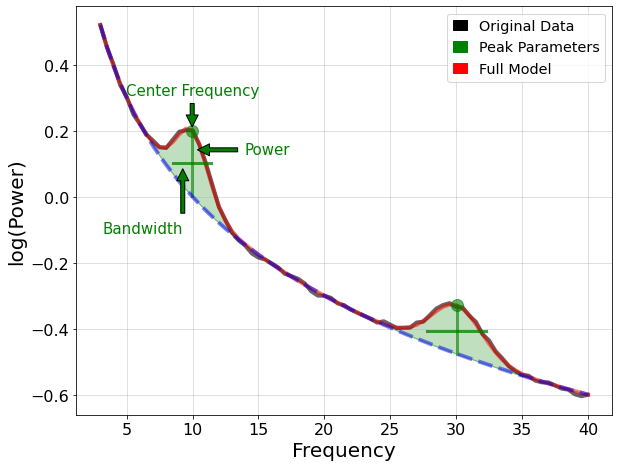

In [98]:
# Plot an annotated version of the power spectrum model
plot_annotated_model(fm1, annotate_aperiodic=False)

In the labeled plot above, we can again see the different components of the model, as well as the labeled peak parameters.

Note that vertical labels reflect parameters measured in the x-axis units, so in frequency, where as horizontal labels reflect parameters measured in y-axis units, so power.

The periodic parameters are:

the center frequency of the peak, in units of frequency
the power of the peak, over the aperiodic component, in units of power
the bandwidth, or the width of the peak, in units of frequency
Wherever we detect a peak, these are the parameters that we will fit to the peak, to describe this component of the data.

# Mathematical Description of the Periodic Component
To fit this periodic activity - the regions of power over above the aperiodic component, or ‘peaks’ - the model uses Gaussians. As we’ve seen, there can be multiple peaks in the model.

Each Gaussian,n , referred to as G(F)n, is of the form:

G(F)n = a*exp(-(F-c)^2/2*w^2)
 
This describes each peak in terms of parameters a, c and w, where:

 is the height of the peak, over and above the aperiodic component
 is the center frequency of the peak
 is the width of the peak
 is the array of frequency values

# Aperiodic Component
By ‘aperiodic’ activity, we mean activity that is not rhythmic, or activity that has no characteristic frequency.

In the power spectrum, we typically see this as 1/f-like activity, whereby (in linear space) the power across frequencies decreases with a 
 
 relationship 1/F^x.

To measure the aperiodic activity, we would like to describe the pattern of activity across all frequencies, without our measure being influenced by co-occurring periodic activity (peaks).

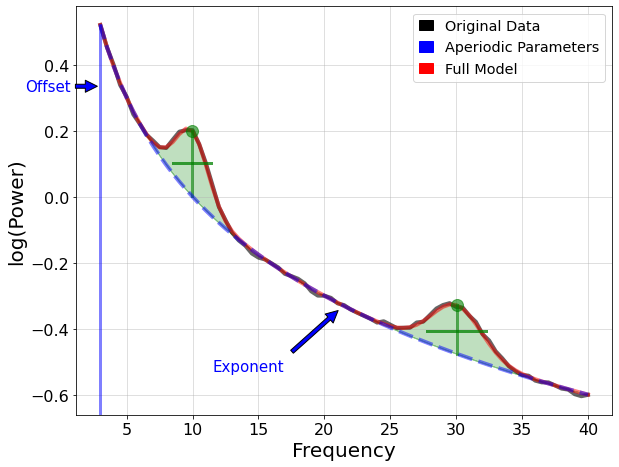

In [99]:
# Plot an annotated version of the power spectrum model
plot_annotated_model(fm1, annotate_peaks=False)

The aperiodic parameters in the above plot are:

the offset, or overall up/down translation of the whole spectrum
the exponent, which describes the ‘curve’, or overall ‘line’ of the aperiodic component
Note that diagonal labels indicate unit-less measures (in neither units of frequency or power).

# Mathematical Description of the Aperiodic Component
To fit the aperiodic component, we will use the function L:

L(F) = b - log(k+F^x)

Note that this function is fit on the semi-log power spectrum, meaning linear frequencies and  log10 power values.

In this formulation, the parameters , b,k, x, and  define the aperiodic component, as:

 b is the broadband ‘offset’
 k is the ‘knee’
 x is the ‘exponent’ of the aperiodic fit
 F is the array of frequency values
Note that fitting the knee parameter is optional. If used, the knee parameter defines a ‘bend’ in the aperiodic 1/f like component of the data. If not used, the ‘knee’ parameter is set to zero.

This function form is technically described as a Lorentzian function. We use the option of adding a knee parameter, since even though neural data is often discussed in terms of having 1/f activity, there is often not a single 1/f characteristic, especially across broader frequency ranges. Therefore, using this function form allows for modeling bends in the power spectrum of the aperiodic component, if and when they occur.

Note that if we were to want the equivalent function in linear power, using AP to indicate the aperiodic component in linear spacing, it would be:

AP = 10^b *(1/(k+F^x))

 


A Note on Logging
So far, we have been plotting in semi-log, meaning the x-axis (frequency) is in linear spacing, and the y-axis (power) is in log10 space. This is common practice, as power values are exponentially distributed.

It can also be useful, for visualization, to plot with both axes on a log scale. Note that in this module, plotting in log-log is just a visualization choice, and does not affect how the data is stored and/or how models are fit.

Below we can see the same spectrum again, with all the annotations on, plotted in log-log. The most notable difference is that the aperiodic component is a straight line in log-log spacing. This is a hallmark of 1/f activity.

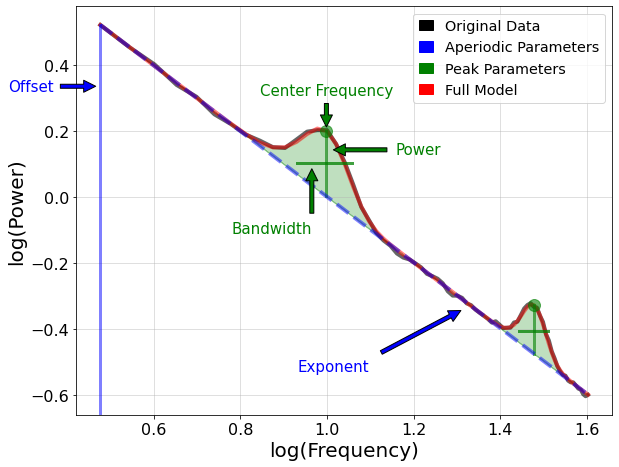

In [100]:
# Plot the power spectrum model, in log-log space
plot_annotated_model(fm1, plt_log=True)

# Relating Exponents to Power Spectrum Slope
Another way to measure 1/f properties in neural power spectra is to measure the slope of the spectrum in log-log spacing, fitting a linear equation as: L(log(F)) = aF+b

Where:

 a is the power spectrum slope
 b is the offset
 F is the array of frequency values
In this formulation, the data is considered in log-log space, meaning the frequency values are also in log space. Since 1/f is a straight line in log-log spacing, this approach captures 1/f activity.

This is equivalent to the power spectrum model in this module, when fitting with no knee, with a direct relationship between the slope (a) and the exponent (x):
x = -a



# Fitting Knees
In the original model we fit and explored, there was no aperiodic ‘knee’. Depending on the data, or the frequency range, there may or may not be a knee present in the data (more on that later in the tutorial).

In the next plot, there is another annotated model, from a broader frequency range that also includes a knee. When plotted in log-log, the presence of a knee can be seen as ‘bend’ or ‘knee’ in the aperiodic component.

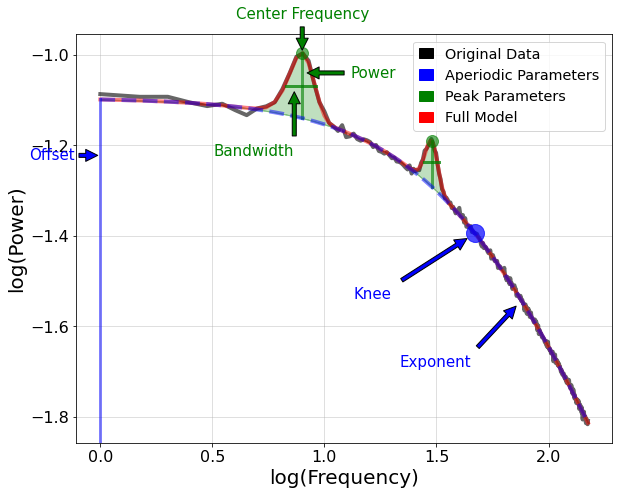

In [101]:
# Plot an annotated version of the power spectrum model
plot_annotated_model(fm2, plt_log=True)

The knee parameter fit to the model is a unit-less value that describes the curve of the aperiodic component (when plotted in log-log spacing). On the plot above, the annotation references the knee as the dot on the plot at the bend point.

# 02: Fitting Power Spectrum Models
Introduction to the module, beginning with the FOOOF object.

In [102]:
# Import the FOOOF object
from fooof import FOOOF

# Import a utility to download and load example data
from fooof.utils.download import load_fooof_data

In [103]:
# Download example data files needed for this example
freqs = load_fooof_data('freqs.npy', folder='data')
spectrum = load_fooof_data('spectrum.npy', folder='data')

# FOOOF Object
At the core of the module is the FOOOF object, which holds relevant data and settings as attributes, and contains methods to run the algorithm to parameterize neural power spectra.

The organization and use of the model object is similar to scikit-learn:

A model object is initialized, with relevant settings
The model is used to fit the data
Results can be extracted from the object
Calculating Power Spectra
The FOOOF object fits models to power spectra. The module itself does not compute power spectra. Computing power spectra needs to be done prior to using the FOOOF module.

The model is broadly agnostic to exactly how power spectra are computed. Common methods, such as Welch’s method, can be used to compute the spectrum.

If you need a module in Python that has functionality for computing power spectra, try NeuroDSP.

Note that FOOOF objects require frequency and power values passed in as inputs to be in linear spacing. Passing in non-linear spaced data (such logged values) may produce erroneous results.

# Fitting an Example Power Spectrum
The following example demonstrates fitting a power spectrum model to a single power spectrum.


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.49
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 40 Hz                        
                                 Frequency Resolution is 0.49 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

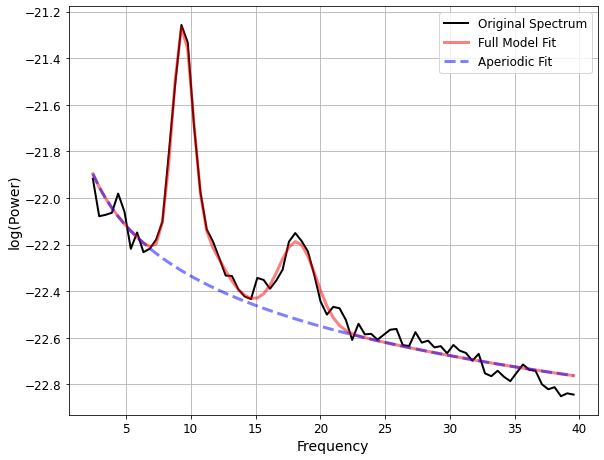

In [104]:
# Initialize a FOOOF object
fm = FOOOF()

# Set the frequency range to fit the model
freq_range = [2, 40]

# Report: fit the model, print the resulting parameters, and plot the reconstruction
fm.report(freqs, spectrum, freq_range)

# Fitting Models with ‘Report’
The above method ‘report’, is a convenience method that calls a series of methods:

fit(): fits the power spectrum model
print_results(): prints out the results
plot(): plots the data and model fit
Each of these methods can also be called individually.

In [105]:
# Alternatively, just fit the model with FOOOF.fit() (without printing anything)
fm.fit(freqs, spectrum, freq_range)

# After fitting, plotting and parameter fitting can be called independently:
# fm.print_results()
# fm.plot()


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.49
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



# Model Parameters
Once the power spectrum model has been calculated, the model fit parameters are stored as object attributes that can be accessed after fitting.

Following scikit-learn conventions, attributes that are fit as a result of the model have a trailing underscore, for example:

aperiodic_params_
peak_params_
error_
r2_
n_peaks_
Access model fit parameters from FOOOF object, after fitting:

In [106]:
# Aperiodic parameters
print('Aperiodic parameters: \n', fm.aperiodic_params_, '\n')

# Peak parameters
print('Peak parameters: \n', fm.peak_params_, '\n')

# Goodness of fit measures
print('Goodness of fit:')
print(' Error - ', fm.error_)
print(' R^2   - ', fm.r_squared_, '\n')

# Check how many peaks were fit
print('Number of fit peaks: \n', fm.n_peaks_)

Aperiodic parameters: 
 [-21.61849957   0.71602269] 

Peak parameters: 
 [[ 9.36187382  1.04444622  1.58733674]
 [11.1723471   0.23008765  2.87693705]
 [18.24843214  0.33140754  2.84640764]] 

Goodness of fit:
 Error -  0.0356081930158135
 R^2   -  0.9828921186995793 

Number of fit peaks: 
 3


# Selecting Parameters
You can also select parameters using the get_params() method, which can be used to specify which parameters you want to extract.

In [107]:
# Extract a model parameter with `get_params`
err = fm.get_params('error')

# Extract parameters, indicating sub-selections of parameters
exp = fm.get_params('aperiodic_params', 'exponent')
cfs = fm.get_params('peak_params', 'CF')

# Print out a custom parameter report
template = ("With an error level of {error:1.2f}, FOOOF fit an exponent "
            "of {exponent:1.2f} and peaks of {cfs:s} Hz.")
print(template.format(error=err, exponent=exp,
                      cfs=' & '.join(map(str, [round(cf, 2) for cf in cfs]))))

With an error level of 0.04, FOOOF fit an exponent of 0.72 and peaks of 9.36 & 11.17 & 18.25 Hz.


Notes on Interpreting Peak Parameters
Peak parameters are labeled as:

CF: center frequency of the extracted peak
PW: power of the peak, over and above the aperiodic component
BW: bandwidth of the extracted peak
Note that the peak parameters that are returned are not exactly the same as the parameters of the Gaussians used internally to fit the peaks.

Specifically:

CF is the exact same as mean parameter of the Gaussian
PW is the height of the model fit above the aperiodic component [1], which is not necessarily the same as the Gaussian height
BW is 2 * the standard deviation of the Gaussian [2]
[1] Since the Gaussians are fit together, if any Gaussians overlap, than the actual height of the fit at a given point can only be assessed when considering all Gaussians. To be better able to interpret heights for individual peaks, we re-define the peak height as above, and label it as ‘power’, as the units of the input data are expected to be units of power.

[2] Gaussian standard deviation is ‘1 sided’, where as the returned BW is ‘2 sided’.

The underlying gaussian parameters are also available from the FOOOF object, in the gaussian_params_ attribute.

In [108]:
# Compare the 'peak_params_' to the underlying gaussian parameters
print('  Peak Parameters \t Gaussian Parameters')
for peak, gauss in zip(fm.peak_params_, fm.gaussian_params_):
    print('{:5.2f} {:5.2f} {:5.2f} \t {:5.2f} {:5.2f} {:5.2f}'.format(*peak, *gauss))

  Peak Parameters 	 Gaussian Parameters
 9.36  1.04  1.59 	  9.36  0.98  0.79
11.17  0.23  2.88 	 11.17  0.17  1.44
18.25  0.33  2.85 	 18.25  0.33  1.42


# FOOOFResults
There is also a convenience method to return all model fit results: get_results().

This method returns all the model fit parameters, including the underlying Gaussian parameters, collected together into a FOOOFResults object.

The FOOOFResults object, which in Python terms is a named tuple, is a standard data object used with FOOOF to organize and collect parameter data.

In [109]:
# Grab each model fit result with `get_results` to gather all results together
#   Note that this returns a FOOOFResult object
fres = fm.get_results()

# You can also unpack all fit parameters when using `get_results`
ap_params, peak_params, r_squared, fit_error, gauss_params = fm.get_results()

In [110]:
# Print out the FOOOFResults
print(fres, '\n')

# From FOOOFResults, you can access the different results
print('Aperiodic Parameters: \n', fres.aperiodic_params)

# Check the R^2 and error of the model fit
print('R-squared: \n {:5.4f}'.format(fm.r_squared_))
print('Fit error: \n {:5.4f}'.format(fm.error_))

FOOOFResults(aperiodic_params=array([-21.61849957,   0.71602269]), peak_params=array([[ 9.36187382,  1.04444622,  1.58733674],
       [11.1723471 ,  0.23008765,  2.87693705],
       [18.24843214,  0.33140754,  2.84640764]]), r_squared=0.9828921186995793, error=0.0356081930158135, gaussian_params=array([[ 9.36187382,  0.97903265,  0.79366837],
       [11.1723471 ,  0.16897043,  1.43846852],
       [18.24843214,  0.3341275 ,  1.42320382]])) 

Aperiodic Parameters: 
 [-21.61849957   0.71602269]
R-squared: 
 0.9829
Fit error: 
 0.0356


# 03: Fitting Algorithm
A step-by-step overview of the algorithm for parameterizing neural power spectra.

Algorithmic Description
In this tutorial we will step through how the power spectrum model is fit.

Note that this notebook is for demonstrative purposes, and does not represent recommended usage of how to fit power spectrum models.

Broadly, the steps in the algorithm are:

An initial fit of the aperiodic component is computed from the power spectrum
This aperiodic fit is subtracted from the power spectrum, creating a flattened spectrum
An iterative process identifies peaks in this flattened spectrum
A full peak fit is re-fit from all of the identified peak candidates
The peak fit is subtracted from the original power spectrum, creating a peak-removed power spectrum
A final fit of the aperiodic component is taken of the peak-removed power spectrum
The full model is reconstructed from the combination of the aperiodic and peak fits, and goodness of fit metrics are calculated.

In [111]:
# General imports
import matplotlib.pyplot as plt

# Import the FOOOF object
from fooof import FOOOF

# Import some internal functions
#   These are used here to demonstrate the algorithm
#   You do not need to import these functions for standard usage of the module
from fooof.sim.gen import gen_aperiodic
from fooof.plts.spectra import plot_spectra
from fooof.plts.annotate import plot_annotated_peak_search

# Import a utility to download and load example data
from fooof.utils.download import load_fooof_data

In [112]:
# Set whether to plot in log-log space
plt_log = False

In [113]:
# Load example data files needed for this example
freqs = load_fooof_data('freqs_2.npy', folder='data')
spectrum = load_fooof_data('spectrum_2.npy', folder='data')

In [114]:
# Initialize a FOOOF object, with some settings
#   These settings will be more fully described later in the tutorials
fm = FOOOF(peak_width_limits=[1, 8], max_n_peaks=6, min_peak_height=0.15)

Note that data can be added to a FOOOF object independent of fitting the model, using the add_data() method. FOOOF objects can also be used to plot data, prior to fitting any models.

In [115]:
# Add data to the object
fm.add_data(freqs, spectrum, [3, 40])

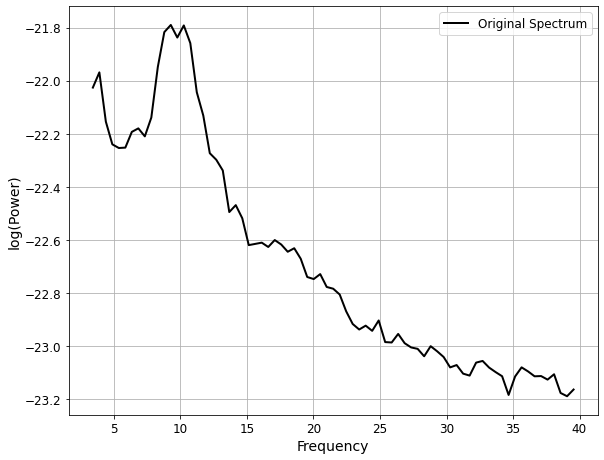

In [116]:
# Plot the power spectrum
fm.plot(plt_log)

The FOOOF object stores most of the intermediate steps internally.

For this notebook, we will first fit the full model, as normal, but then step through, and visualize each step the algorithm took to come to that final fit.

In [117]:
# Fit the power spectrum model
fm.fit(freqs, spectrum, [3, 40])

# Step 1: Initial Aperiodic Fit
We start by taking an initial aperiodic fit. This goal of this fit is to get an initial fit that is good enough to get started with the fitting process.

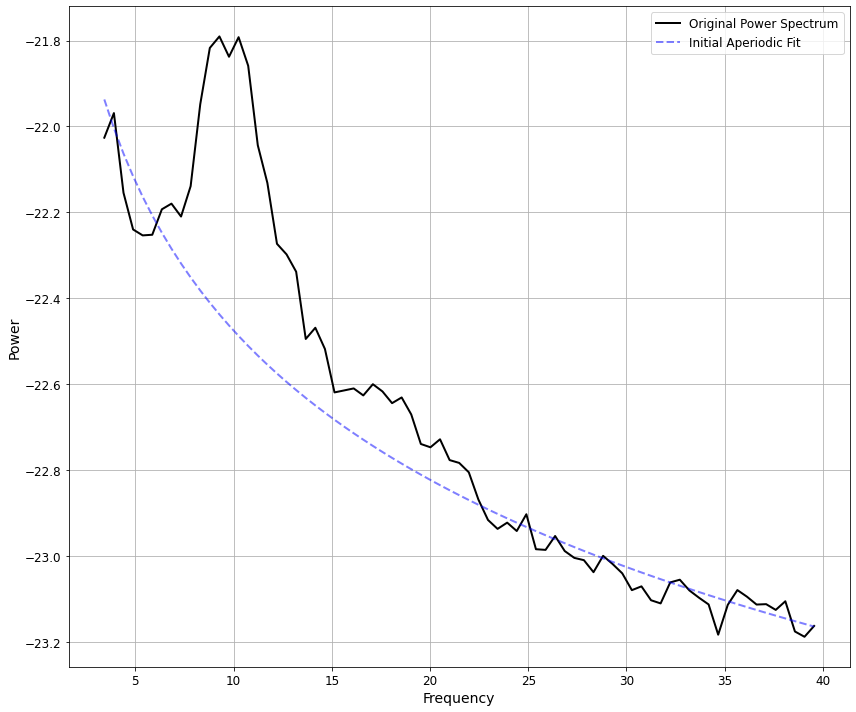

In [118]:
# Do an initial aperiodic fit - a robust fit, that excludes outliers
#   This recreates an initial fit that isn't ultimately stored in the FOOOF object
init_ap_fit = gen_aperiodic(fm.freqs, fm._robust_ap_fit(fm.freqs, fm.power_spectrum))

# Plot the initial aperiodic fit
_, ax = plt.subplots(figsize=(12, 10))
plot_spectra(fm.freqs, fm.power_spectrum, plt_log,
             label='Original Power Spectrum', color='black', ax=ax)
plot_spectra(fm.freqs, init_ap_fit, plt_log, label='Initial Aperiodic Fit',
             color='blue', alpha=0.5, linestyle='dashed', ax=ax)

# Step 2: Flatten the Spectrum
The initial fit is then used to create a flattened spectrum.

The initial aperiodic fit is subtracted out from the original data, leaving a flattened version of the data which no longer contains the aperiodic component.

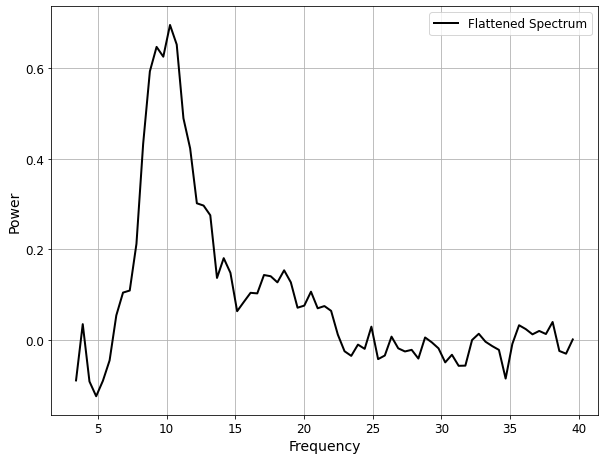

In [119]:
# Recompute the flattened spectrum using the initial aperiodic fit
init_flat_spec = fm.power_spectrum - init_ap_fit

# Plot the flattened the power spectrum
plot_spectra(fm.freqs, init_flat_spec, plt_log,
             label='Flattened Spectrum', color='black')

# Step 3: Detect Peaks
The flattened spectrum is then used to detect peaks. We can better isolate peaks in the data, as the aperiodic activity has been removed.

The fitting algorithm uses an iterative procedure to find peaks in the flattened spectrum.

For each iteration:

The maximum point of the flattened spectrum is found
If this point fails to pass the relative or absolute height threshold, the procedure halts
A Gaussian is fit around this maximum point
This ‘guess’ Gaussian is then subtracted from the flatted spectrum
The procedure continues to a new iteration with the new version of the flattened spectrum, unless max_n_peaks has been reached

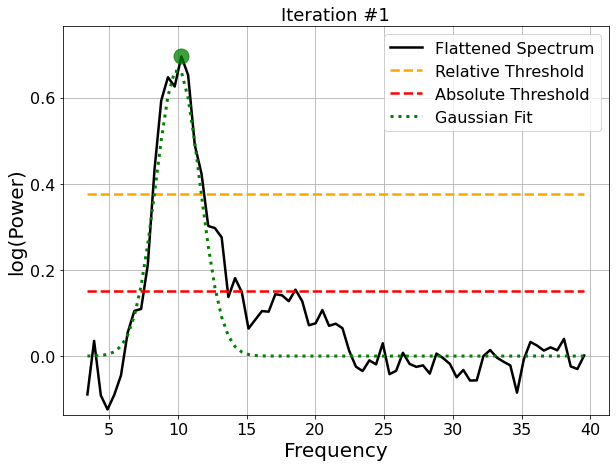

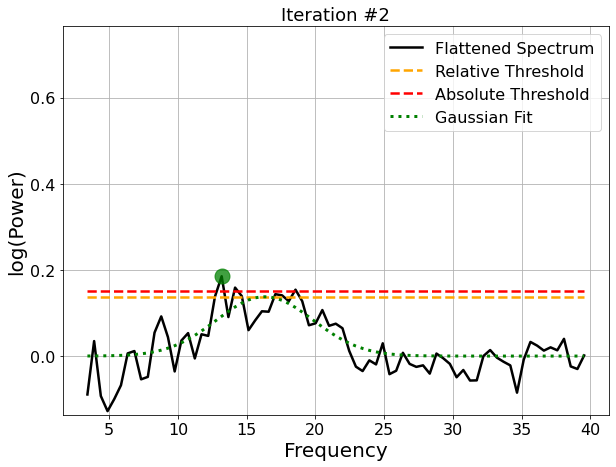

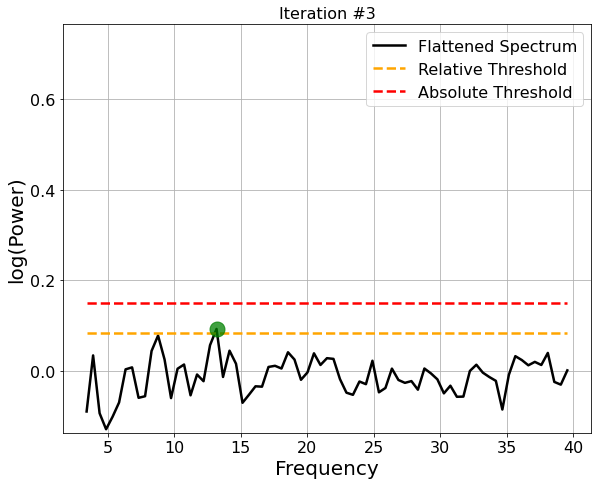

In [120]:
# Plot the iterative approach to finding peaks from the flattened spectrum
plot_annotated_peak_search(fm)

# Step 4: Create Full Peak Fit
Once the iterative procedure has halted and the peaks have been identified in the flattened spectrum, the set of identified ‘guess’ peaks, are then re-fit, all together. This creates the full peak fit of the data.

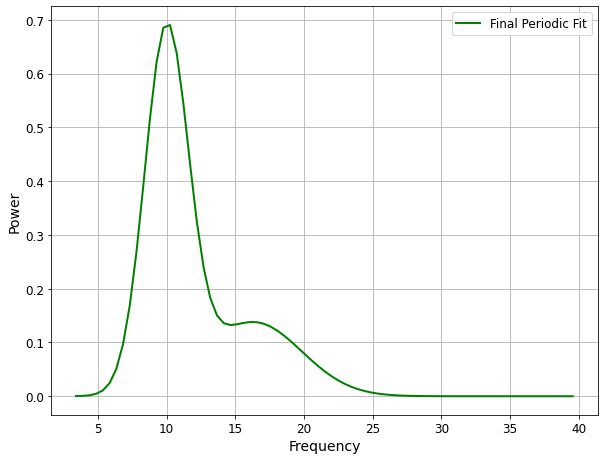

In [121]:
# Plot the peak fit: created by re-fitting all of the candidate peaks together
plot_spectra(fm.freqs, fm._peak_fit, plt_log, color='green', label='Final Periodic Fit')

# Step 5: Create a Peak-Removed Spectrum
Now that the peak component of the fit is completed and available, this fit is then used in order to try and isolate a better aperiodic fit.

To do so, the peak fit is removed from the original power spectrum, leaving an ‘aperiodic-only’ spectrum for re-fitting.

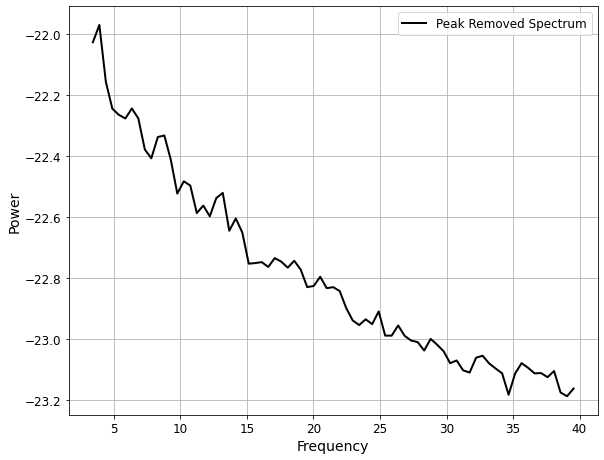

In [122]:
# Plot the peak removed power spectrum, created by removing peak fit from original spectrum
plot_spectra(fm.freqs, fm._spectrum_peak_rm, plt_log,
             label='Peak Removed Spectrum', color='black')

# Step 6: Re-fit the Aperiodic Component
The initial aperiodic component fit we made was a robust fit approach that was used to get the fitting process started.

With the peak-removed spectrum, we can now re-fit the aperiodic component, to re-estimate a better fit, without the peaks getting in the way.

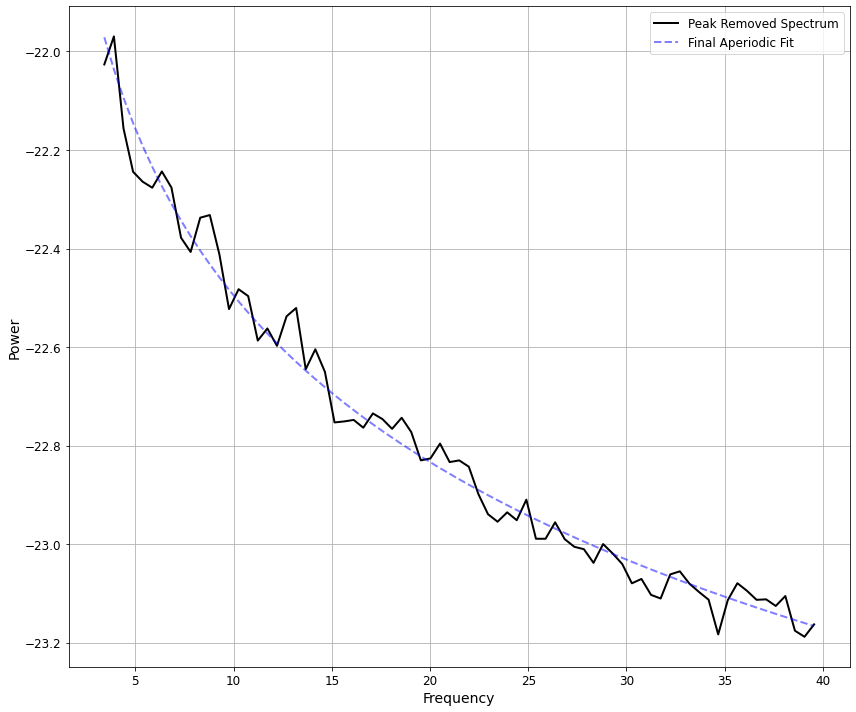

In [123]:
# Plot the final aperiodic fit, calculated on the peak removed power spectrum
_, ax = plt.subplots(figsize=(12, 10))
plot_spectra(fm.freqs, fm._spectrum_peak_rm, plt_log,
             label='Peak Removed Spectrum', color='black', ax=ax)
plot_spectra(fm.freqs, fm._ap_fit, plt_log, label='Final Aperiodic Fit',
             color='blue', alpha=0.5, linestyle='dashed', ax=ax)

# Step 7: Combine the Full Model Fit
Now that we have the final aperiodic fit, we can combine the aperiodic components to create the full model fit.

With this full model fit, we can also calculate the goodness of fit metrics, including the error of the fit and the R-squared of the fit, by comparing the full model fit to the original data.

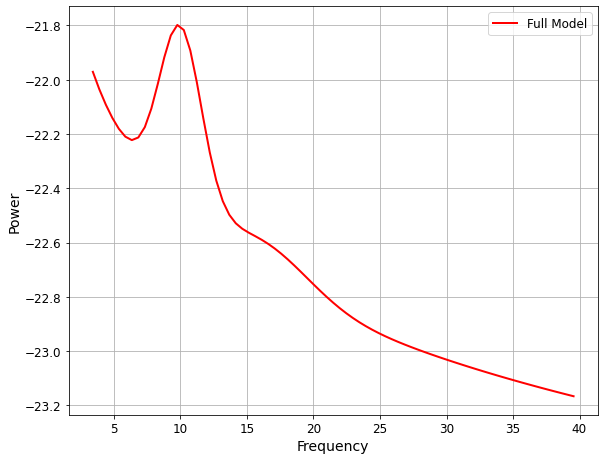

In [124]:
# Plot full model, created by combining the peak and aperiodic fits
plot_spectra(fm.freqs, fm.fooofed_spectrum_, plt_log,
             label='Full Model', color='red')

The last stage is to calculate the goodness of fit metrics, meaning the fit error & R^2.

At the end of the fitting process, the model object also organizes parameters, such as updating gaussian parameters to be peak parameters,

These results are part of what are stored, and printed, as the model results.

In [125]:
# Print out the model results
fm.print_results()

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 3 - 40 Hz                        
                                 Frequency Resolution is 0.49 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -21.3713, 1.1239                                         
                                                                                                  
                                       2 peaks were found:                                        
          

# Altogether, the full model fit is now available, and can be plotted.

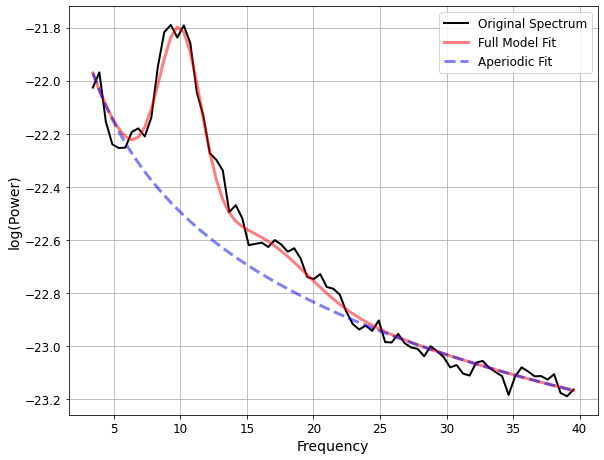

In [126]:
# Plot the full model fit of the power spectrum
#  The final fit (red), and aperiodic fit (blue), are the same as we plotted above
fm.plot(plt_log)

# Addendum: Data & Model Component Attributes
As you may have noticed through this tutorial, the FOOOF object keeps track of some versions of the original data as well as individual model components fits, as well as the final model fit, the ultimate outcome of the fitting procedure.

These attributes in the FOOOF object are kept at the end of the fitting procedure. Though they are primarily computed for internal use (hence being considered ‘private’ attributes, with the leading underscore), they are accessible and potentially useful for some analyses, and so are briefly described here.

Stored model components:

Aperiodic Component: _ap_fit
This is the aperiodic-only fit of the data.
It is computed by generating a reconstruction of the measured aperiodic parameters
Periodic Component: _peak_fit
This is the periodic-only (or peak) fit of the data.
It is computed by generating a reconstruction of the measured periodic (peak) parameters
Stored data attributes:

Flattened Spectrum: _spectrum_flat
The original data, with the aperiodic component removed
This is computed as power_spectrum - _ap_fit
Peak Removed Spectrum: _spectrum_peak_rm
The original data, with the periodic component (peaks) removed
This is computed as power_spectrum - _peak_fit